In [29]:
import numpy as np
import pickle

import sys
module_paths = ['']
for path in module_paths :
    if path not in sys.path:
        sys.path.append(path)

from utils_load_PHloc import (extract_PH_heatmaps_single_sample,
contour_heatmaps,
collect_paired_crit_sizes,
collect_indiv_crit_sizes)

from utils_load_PHloc import datasets_of_interest, injected_datasets_of_interest, levels_of_interest

# folder where you put the PHloc files
PH_folder = '' 

# choose desired anatomy: 'knee', 'long', 'both' (which is a merge of the birth-death points)
anatomy = 'knee'

# load file
filepath = PH_folder + 'PH_all_{}.pkl'.format(anatomy)
print('I will load',filepath)
PH_all_datasets = pickle.load(open(filepath, 'rb'))


I will load PH_all_knee.pkl


In [30]:
# threshold value
THR = .5

# generate a new dictionary for truncated datasets
truncated_PH_all_datasets = {}
for i in datasets_of_interest:
    diagram = PH_all_datasets[i]
    truncated_PH_all_datasets[i] = diagram[diagram[:,1] >= diagram[:,0] + THR]
    
# print size of the diagrams
for i in datasets_of_interest:
    diagram1 = PH_all_datasets[i]
    diagram2 = truncated_PH_all_datasets[i]
print("done")

done


In [31]:
names = [injected_datasets_of_interest[i]+"_"+[str(x) for x in datasets_of_interest][i] for i in range(27)]
print(names)

['CTRL_26', 'CTRL_38', 'CTRL_59', 'CTRL_79', 'U937_37', 'U937_58', 'U937_72', 'U937_67', 'U937_31', 'U937_36', 'U937_57', 'HL60_56', 'HL60_44', 'HL60_65', 'P1_68', 'P1_66', 'P1_73', 'P1_77', 'P1_55', 'P1_27', 'P2_60', 'P2_74', 'P2_42', 'MNC_71', 'MNC_76', 'MNC_61', 'MNC_80']


In [4]:
print([injected_datasets_of_interest[i]+"_"+[str(x) for x in levels_of_interest][i] for i in range(27)])


['CTRL_0', 'CTRL_0', 'CTRL_0', 'CTRL_0', 'U937_1', 'U937_1', 'U937_7', 'U937_8', 'U937_10', 'U937_10', 'U937_10', 'HL60_23', 'HL60_25', 'HL60_25', 'P1_10', 'P1_40', 'P1_44', 'P1_51', 'P1_60', 'P1_76', 'P2_59', 'P2_88', 'P2_90', 'MNC_53', 'MNC_67', 'MNC_75', 'MNC_86']


In [5]:
labels = ['CTRL_0%(1)', 'CTRL_0%(2)', 'CTRL_0%(3)', 'CTRL_0%(4)', 
          'U937_1%(1)', 'U937_1%(2)', 'U937_7%', 'U937_8%', 'U937_10%(1)', 'U937_10%(2)', 'U937_10%(3)', 
          'HL60_23%', 'HL60_25%(1)', 'HL60_25%(2)', 
          'P1_10%', 'P1_40%', 'P1_44%', 'P1_51%', 'P1_60%', 'P1_76%', 
          'P2_59%', 'P2_88%', 'P2_90%', 
          'MNC_53%', 'MNC_67%', 'MNC_75%', 'MNC_86%']

# phases_of_interest = [0,0,0,0,
#          1,1,1,1,1,1,1,
#          1,1,1,
#          1,2,2,2,2,1,
#          2,2,2,
#          1,2,2,2]
 
phases_of_interest = ["O","O","O","O",
         "I","I","I","I","I","I","I",
         "I","I","I",
         "I","II","II","II","II","I",
         "II","II","II",
         "I","II","II","II"]

name_phase = [labels[i]+" [Phase "+phases_of_interest[i]+"]" for i in range(27)]


In [32]:
import matplotlib.pyplot as plt

################ PARAMETERS

# default values used: WEIGHTS = True (dirac masses weighted by persistence) ; SIGMA = .5

WEIGHTS = True
SIGMA = .5

# Binning parameters
XLIMS = np.array([[-15,0],[-10,10],[0,20]])
YLIMS = np.array([[-8,7],[-5,15],[0,20]])
NB_BINS_PER_SIDE = 100

heatmaps_list = []
for i in datasets_of_interest:
    heatmaps_list.append(extract_PH_heatmaps_single_sample(truncated_PH_all_datasets[i], THR, WEIGHTS, SIGMA,
                                                XLIMS, YLIMS, NB_BINS_PER_SIDE,
                                                   discard_PH0_NW = False,
                                                   option = 'keops'))

excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points


In [43]:
# noramlize
for i in range(27):
    maps0 = heatmaps_list[i][0]
    maps1 = heatmaps_list[i][1]
    maps2 = heatmaps_list[i][2]
    heatmaps_list[i][0] = maps0/np.sum(maps0)
    heatmaps_list[i][1] = maps1/np.sum(maps1)
    heatmaps_list[i][2] = maps2/np.sum(maps2)

In [47]:
np.sum(heatmaps_list[0][2])

1.0000000000000002

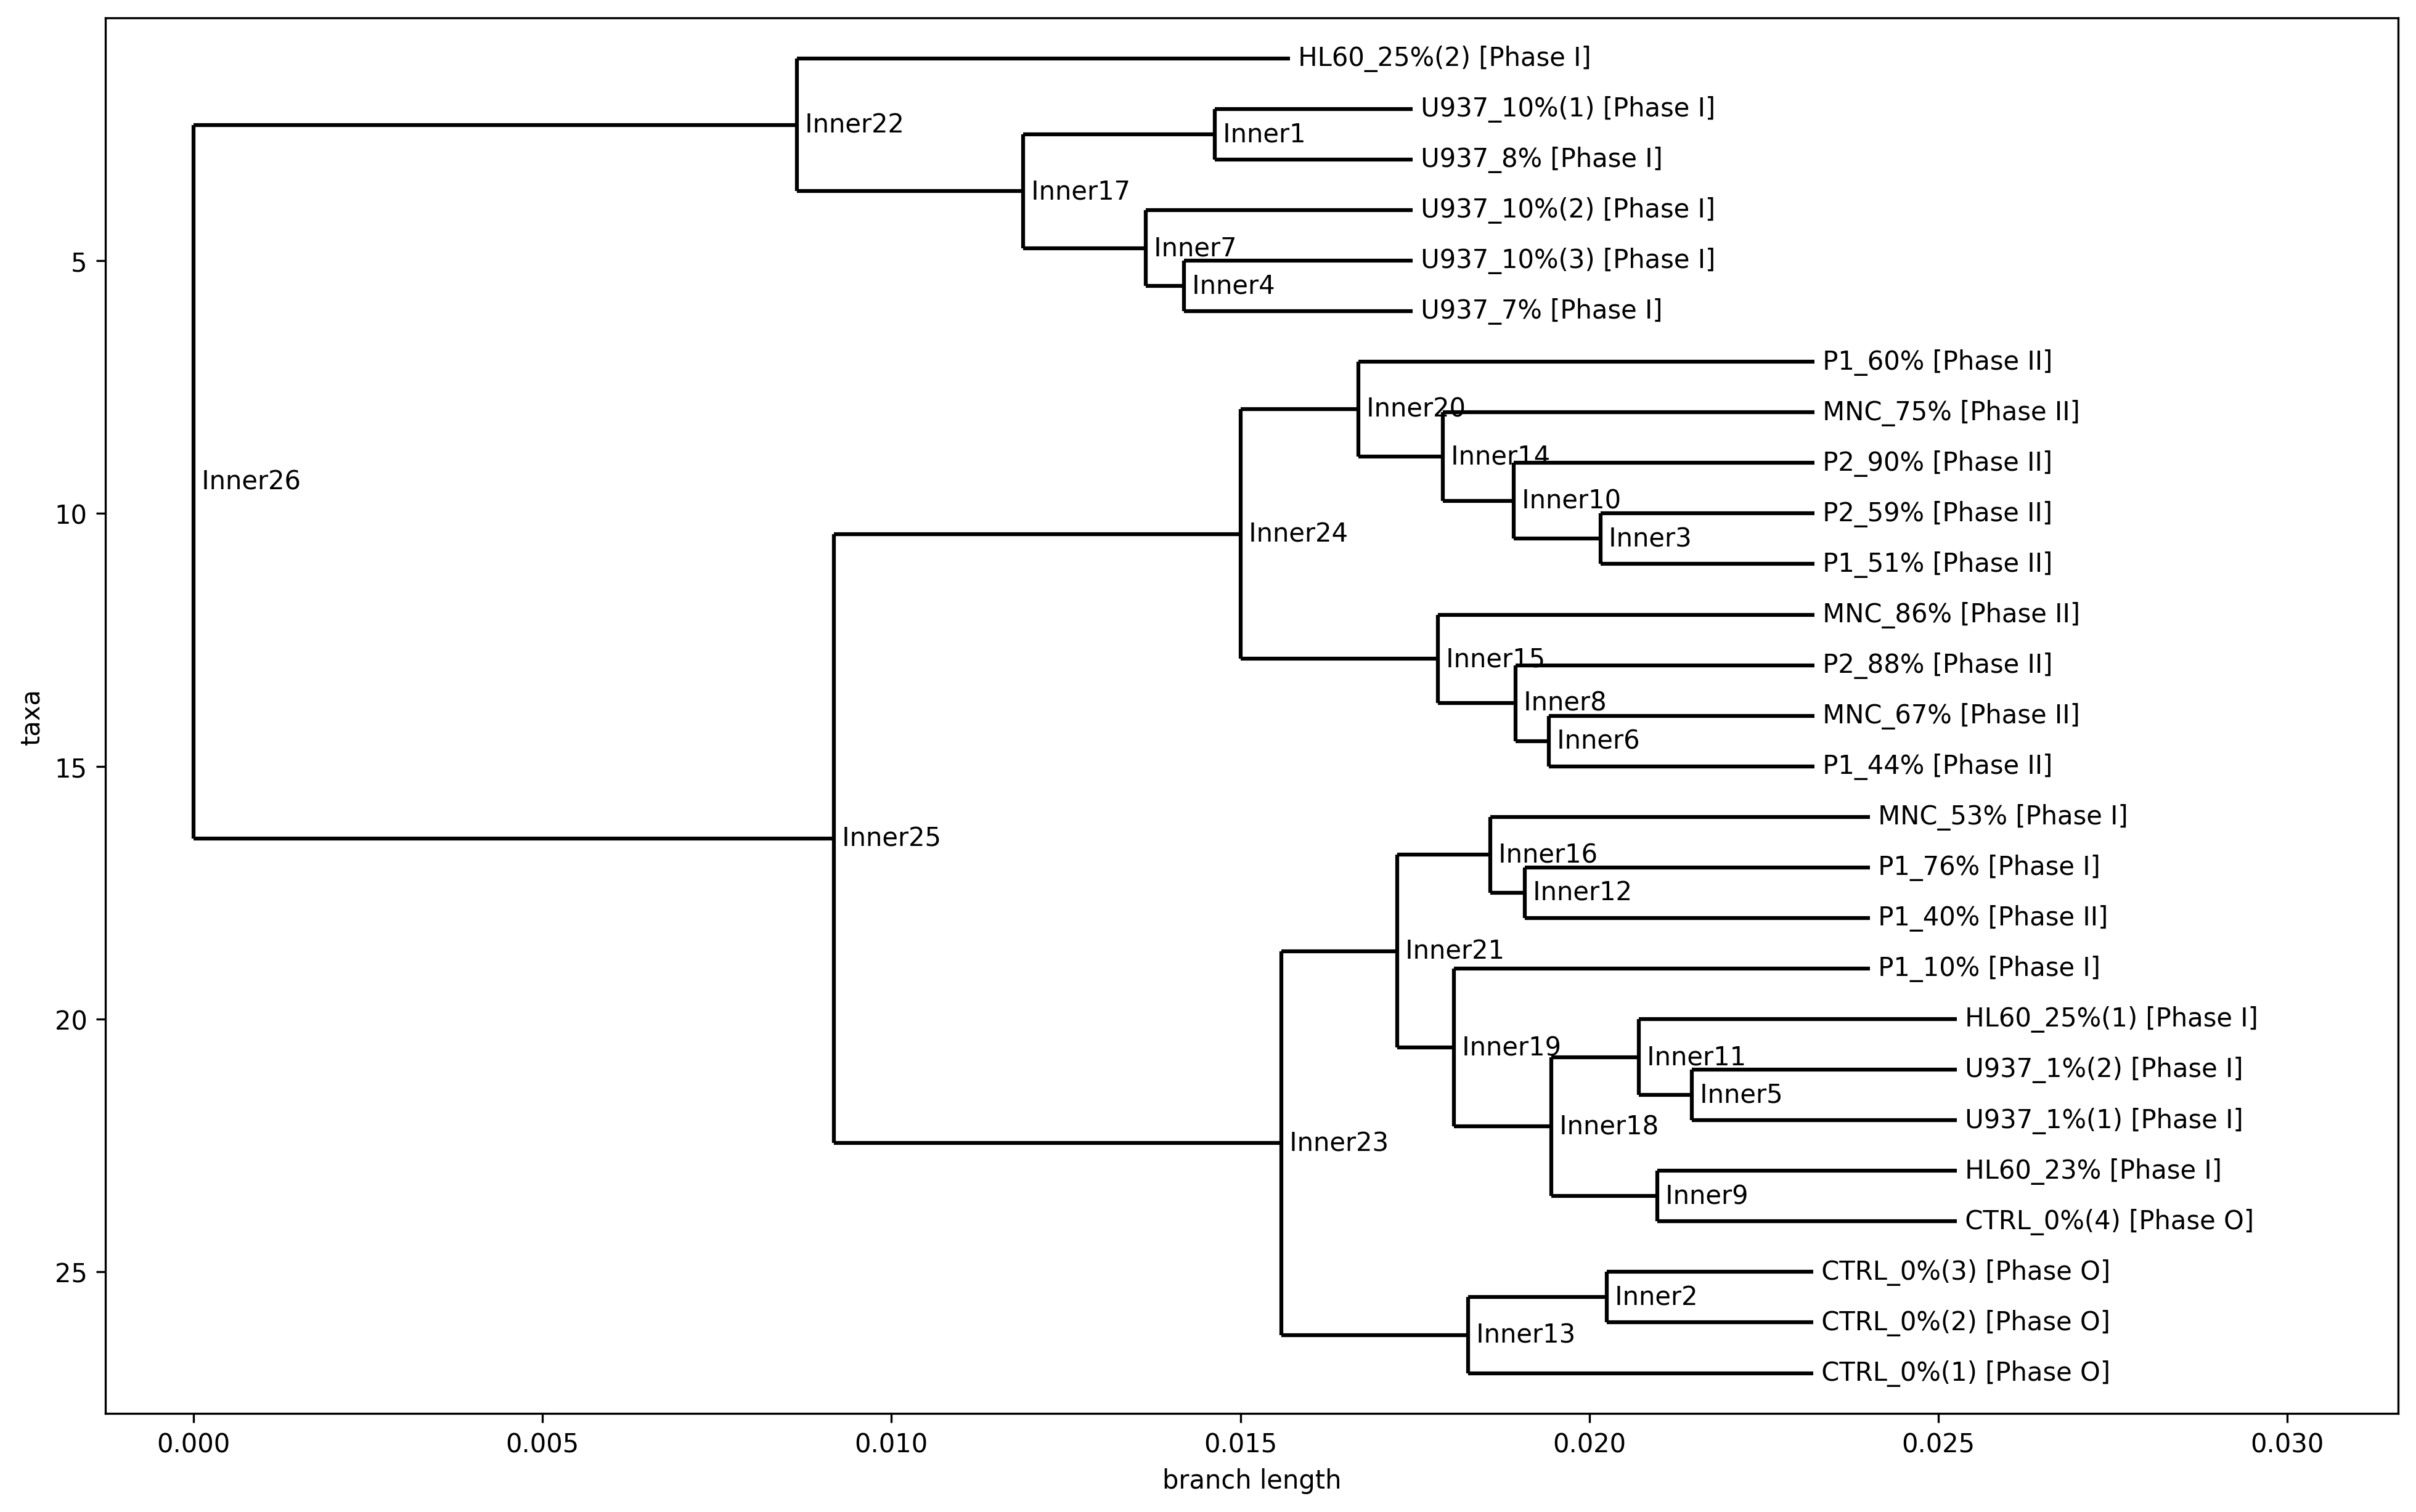

In [48]:
# Importing necessary libraries from BioPython
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor


heatmap_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i]-heatmaps_list[j]))
    heatmap_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap_distlist)
UPGMATree = constructor.upgma(heatmap_distmat)
fig = plt.figure(figsize=(16,10), dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

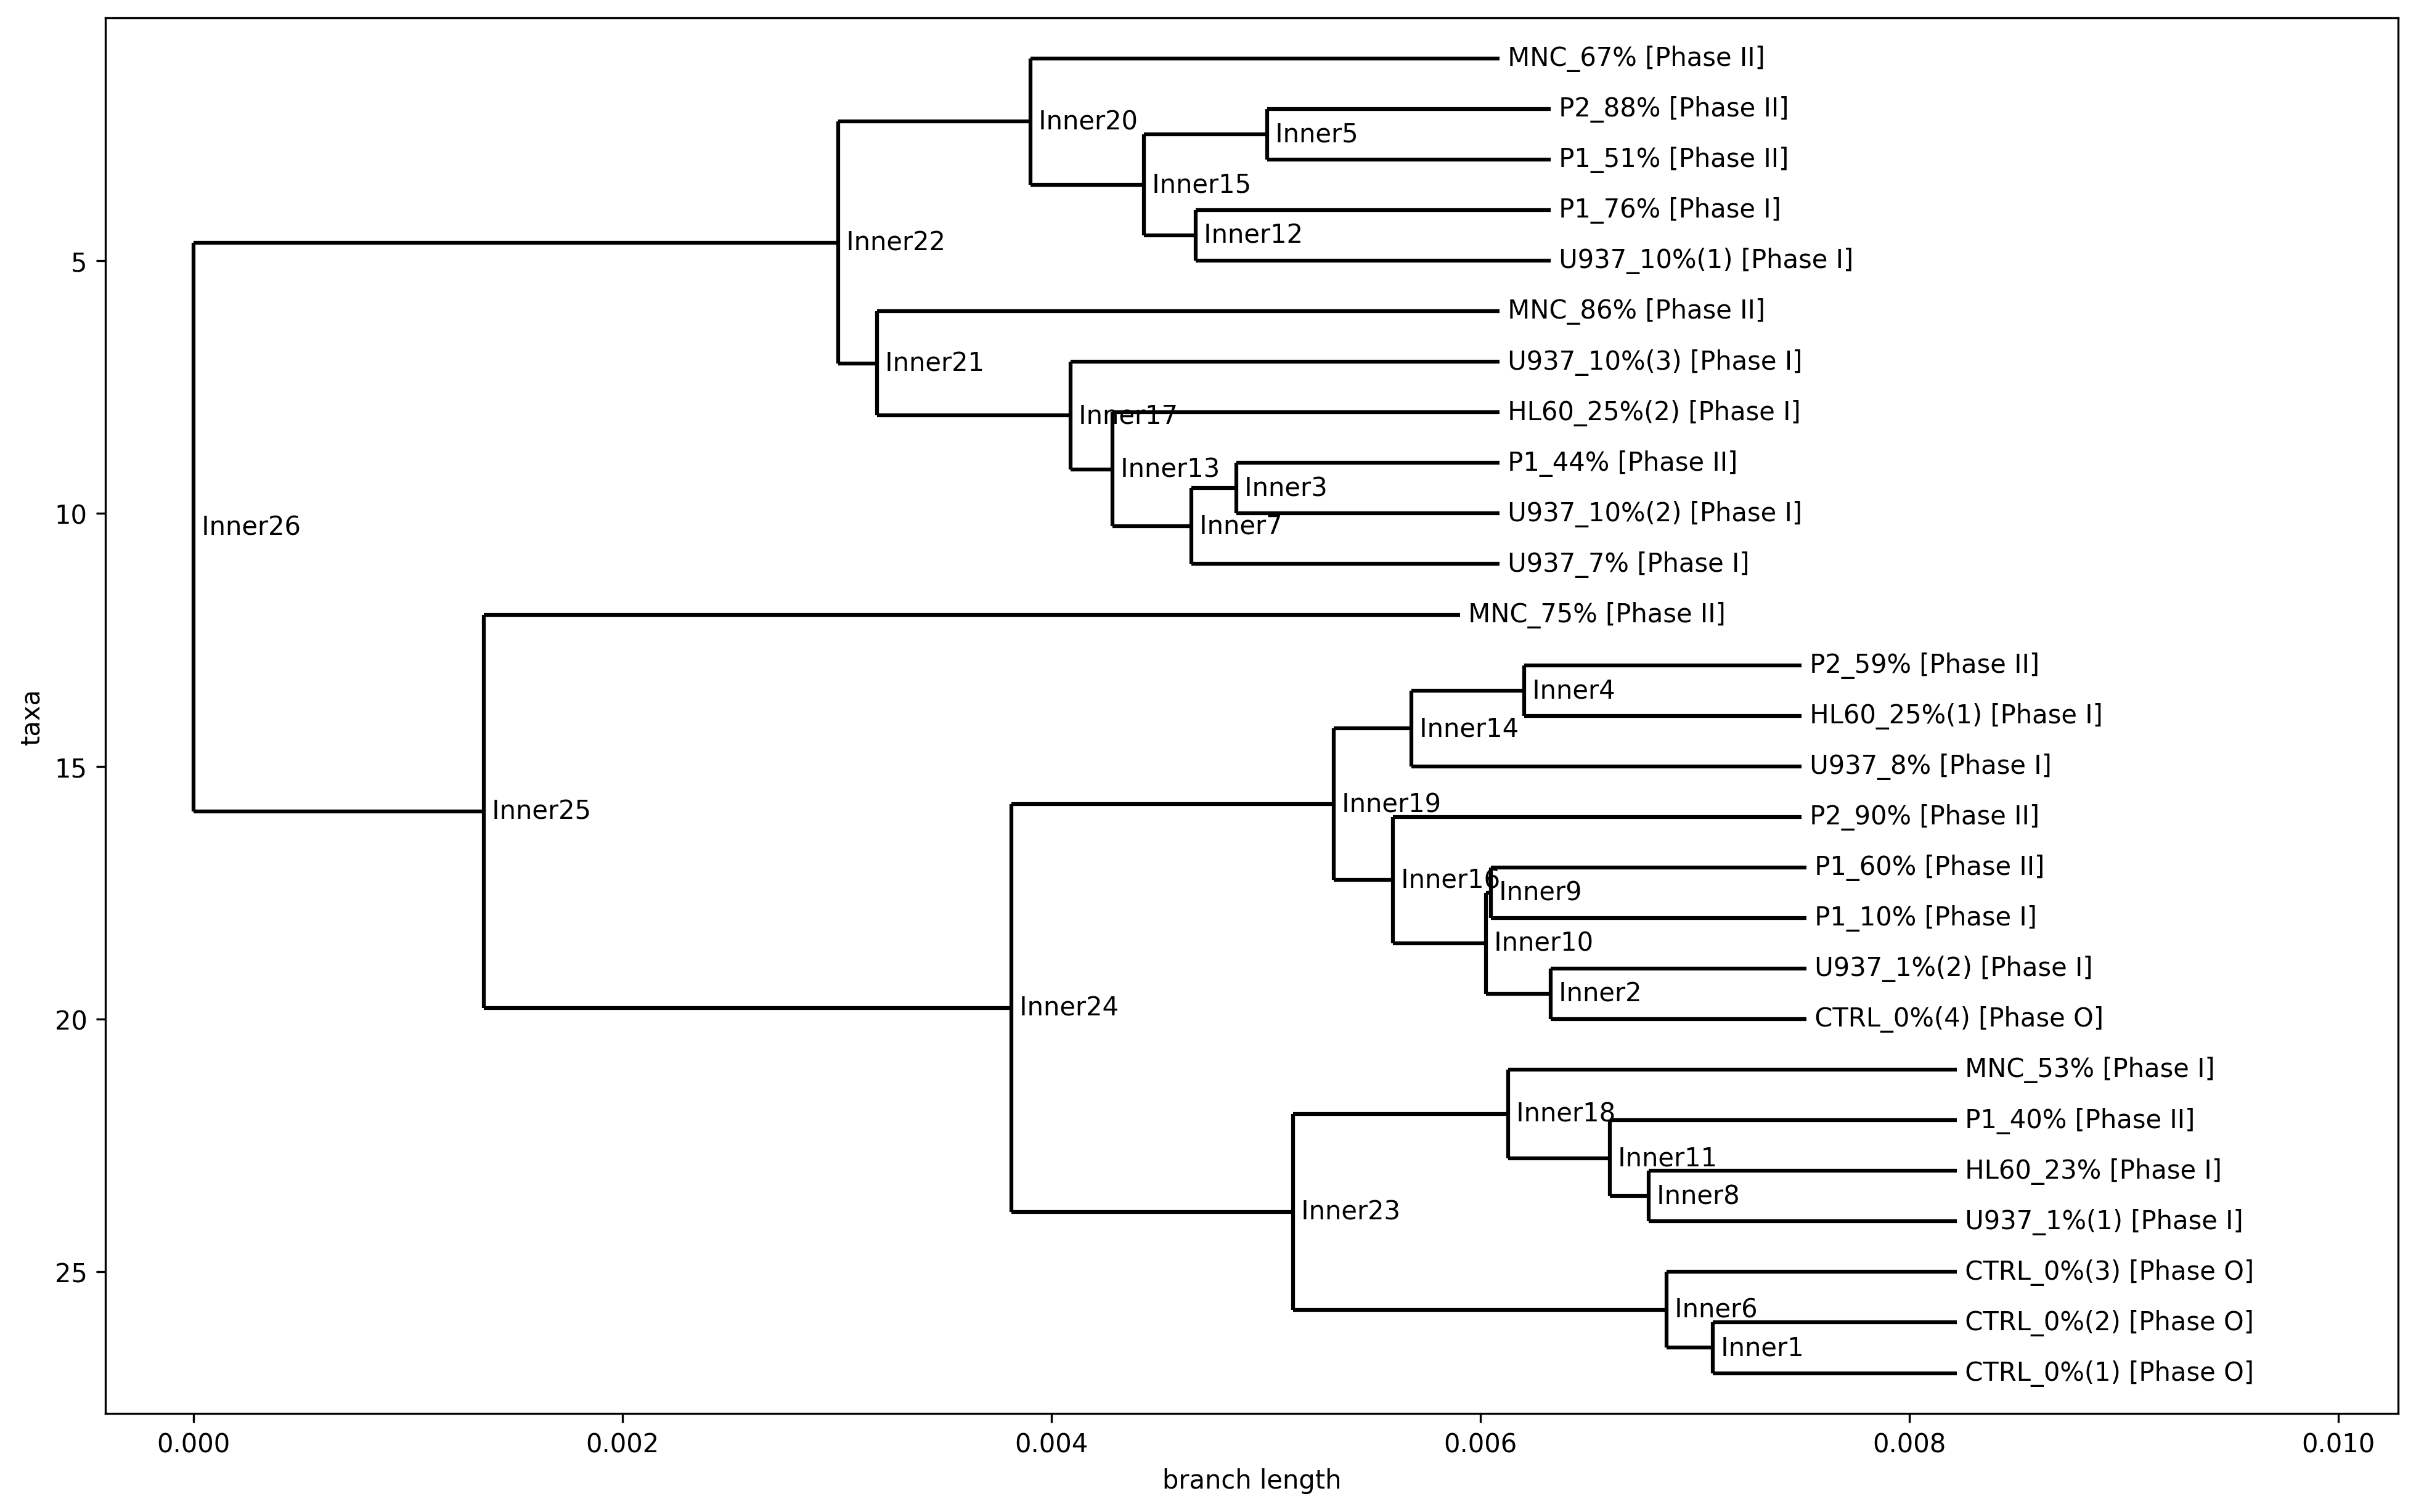

In [49]:
heatmap0_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i][0]-heatmaps_list[j][0]))
    heatmap0_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap0_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap0_distlist)
UPGMATree = constructor.upgma(heatmap0_distmat)
fig = plt.figure(figsize=(16,10), dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

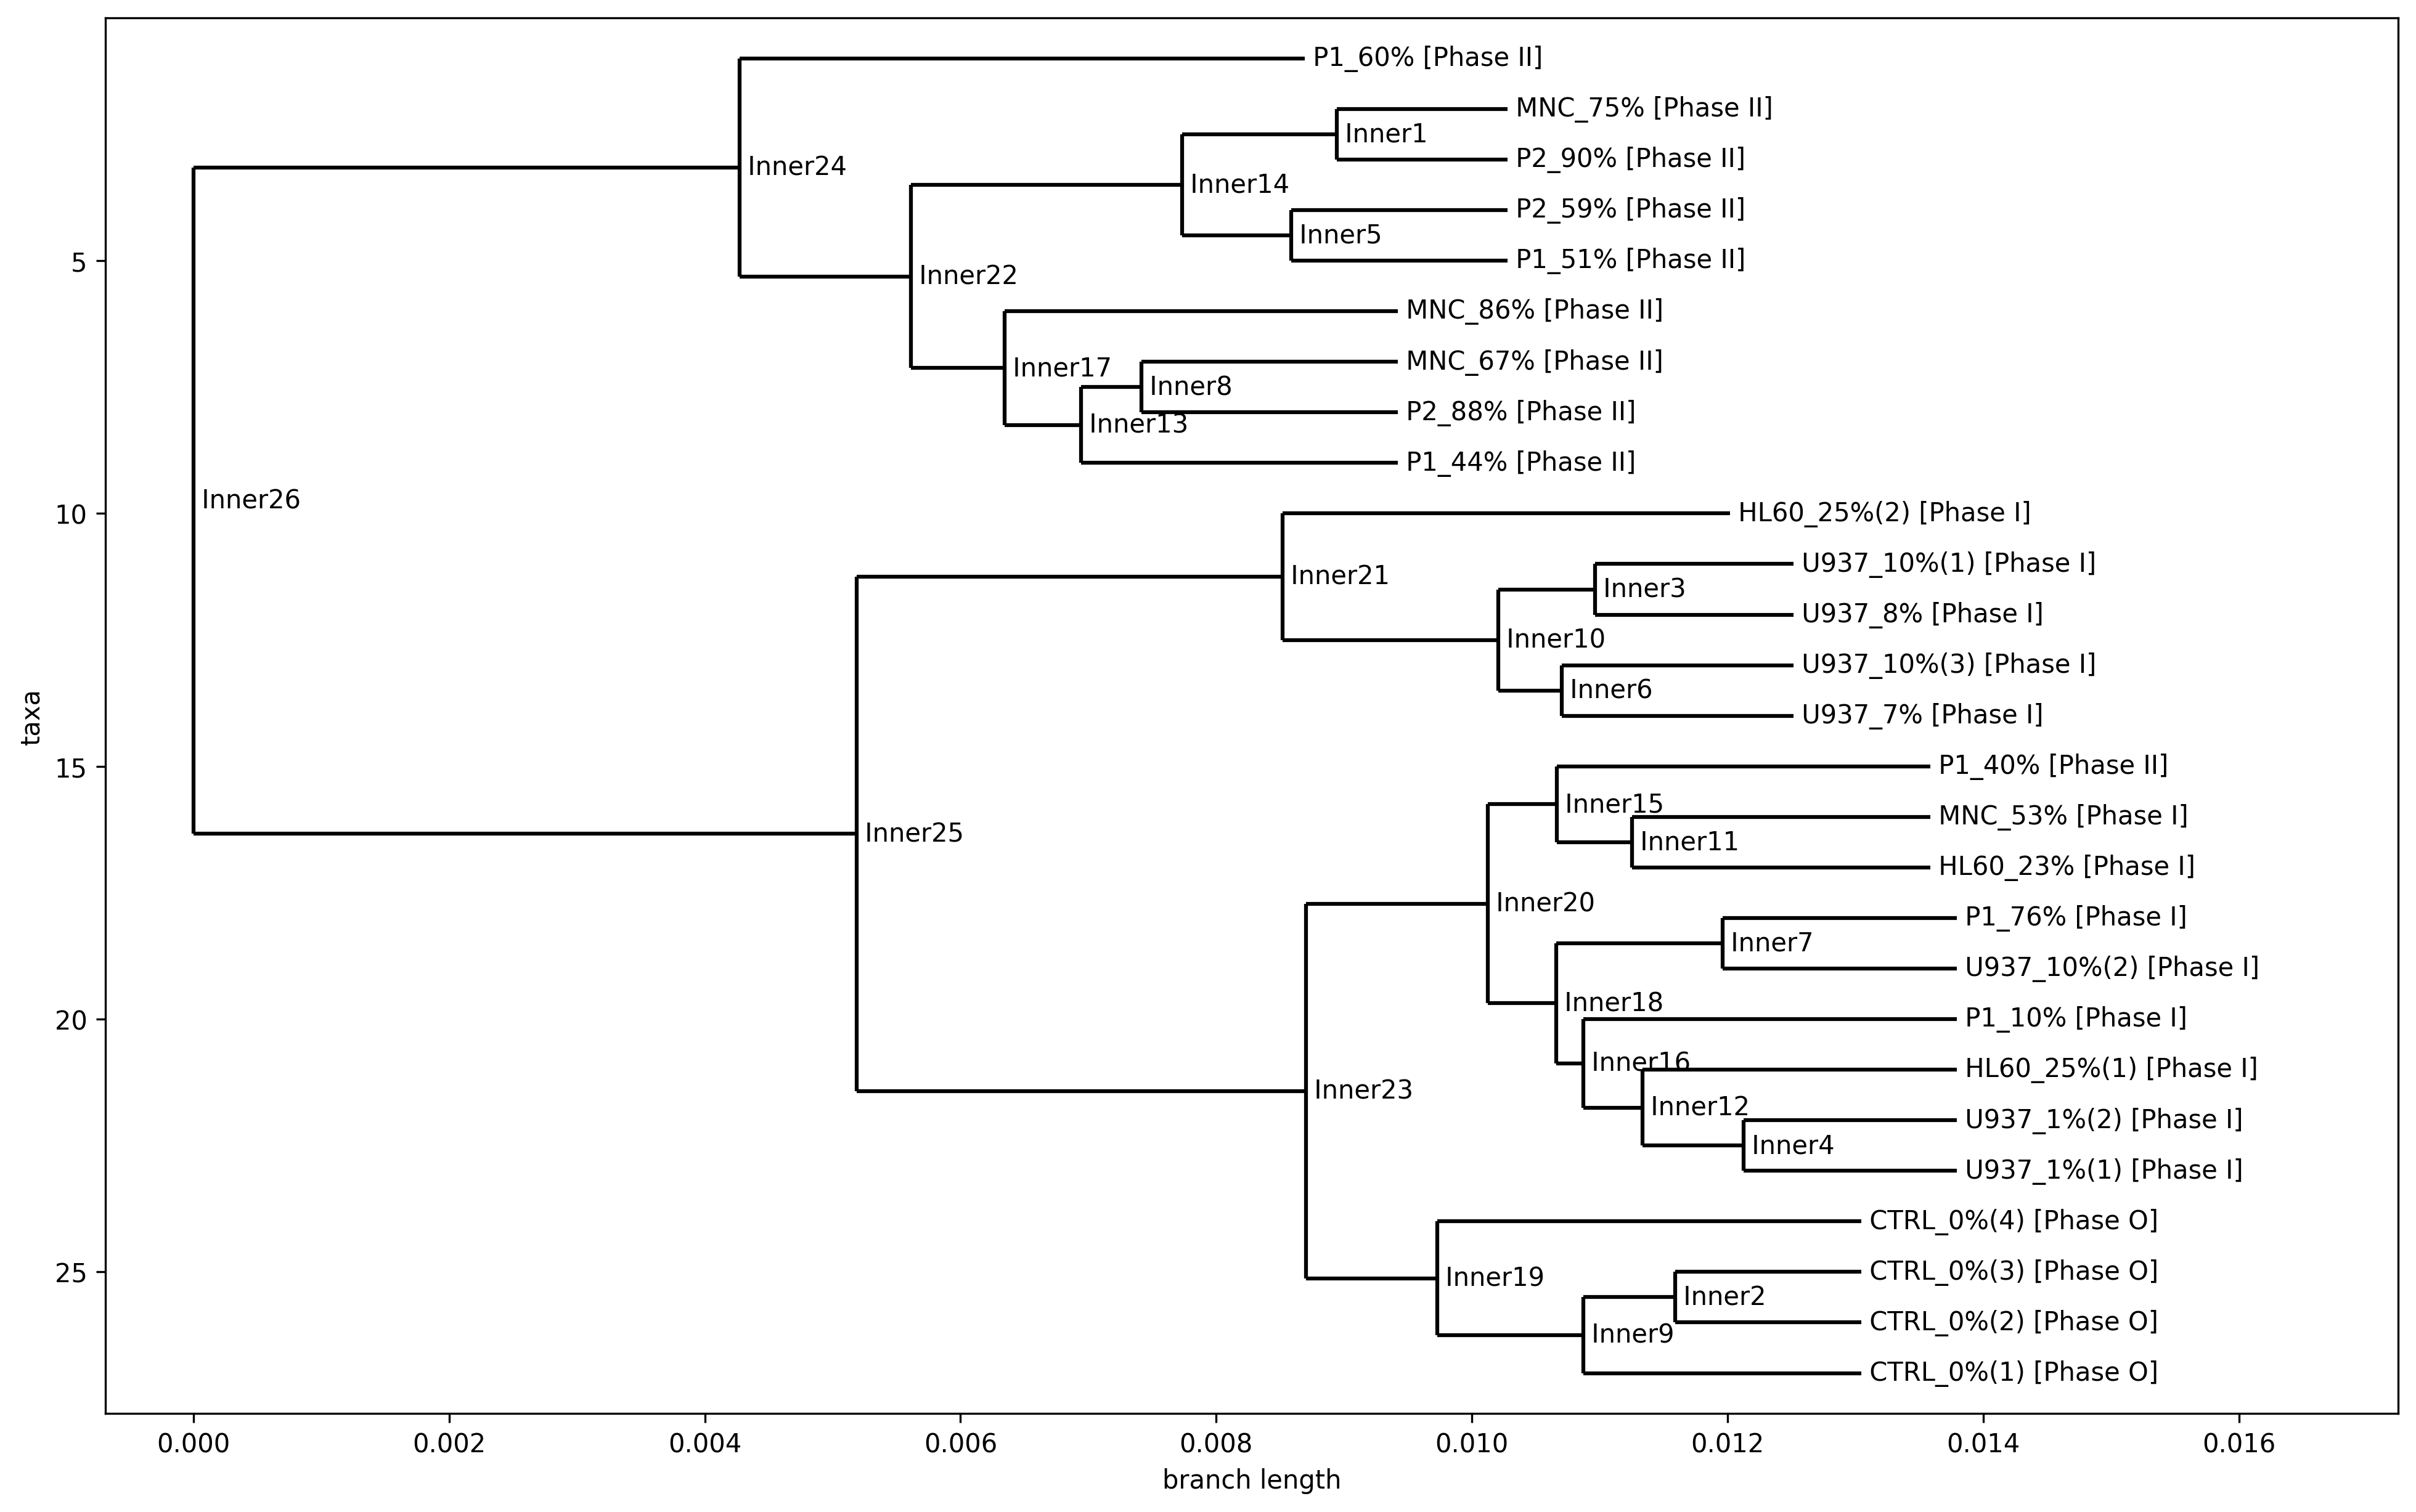

In [51]:
heatmap1_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i][1]-heatmaps_list[j][1]))
    heatmap1_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap1_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap1_distlist)
UPGMATree = constructor.upgma(heatmap1_distmat)
fig = plt.figure(figsize=(16,10),dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

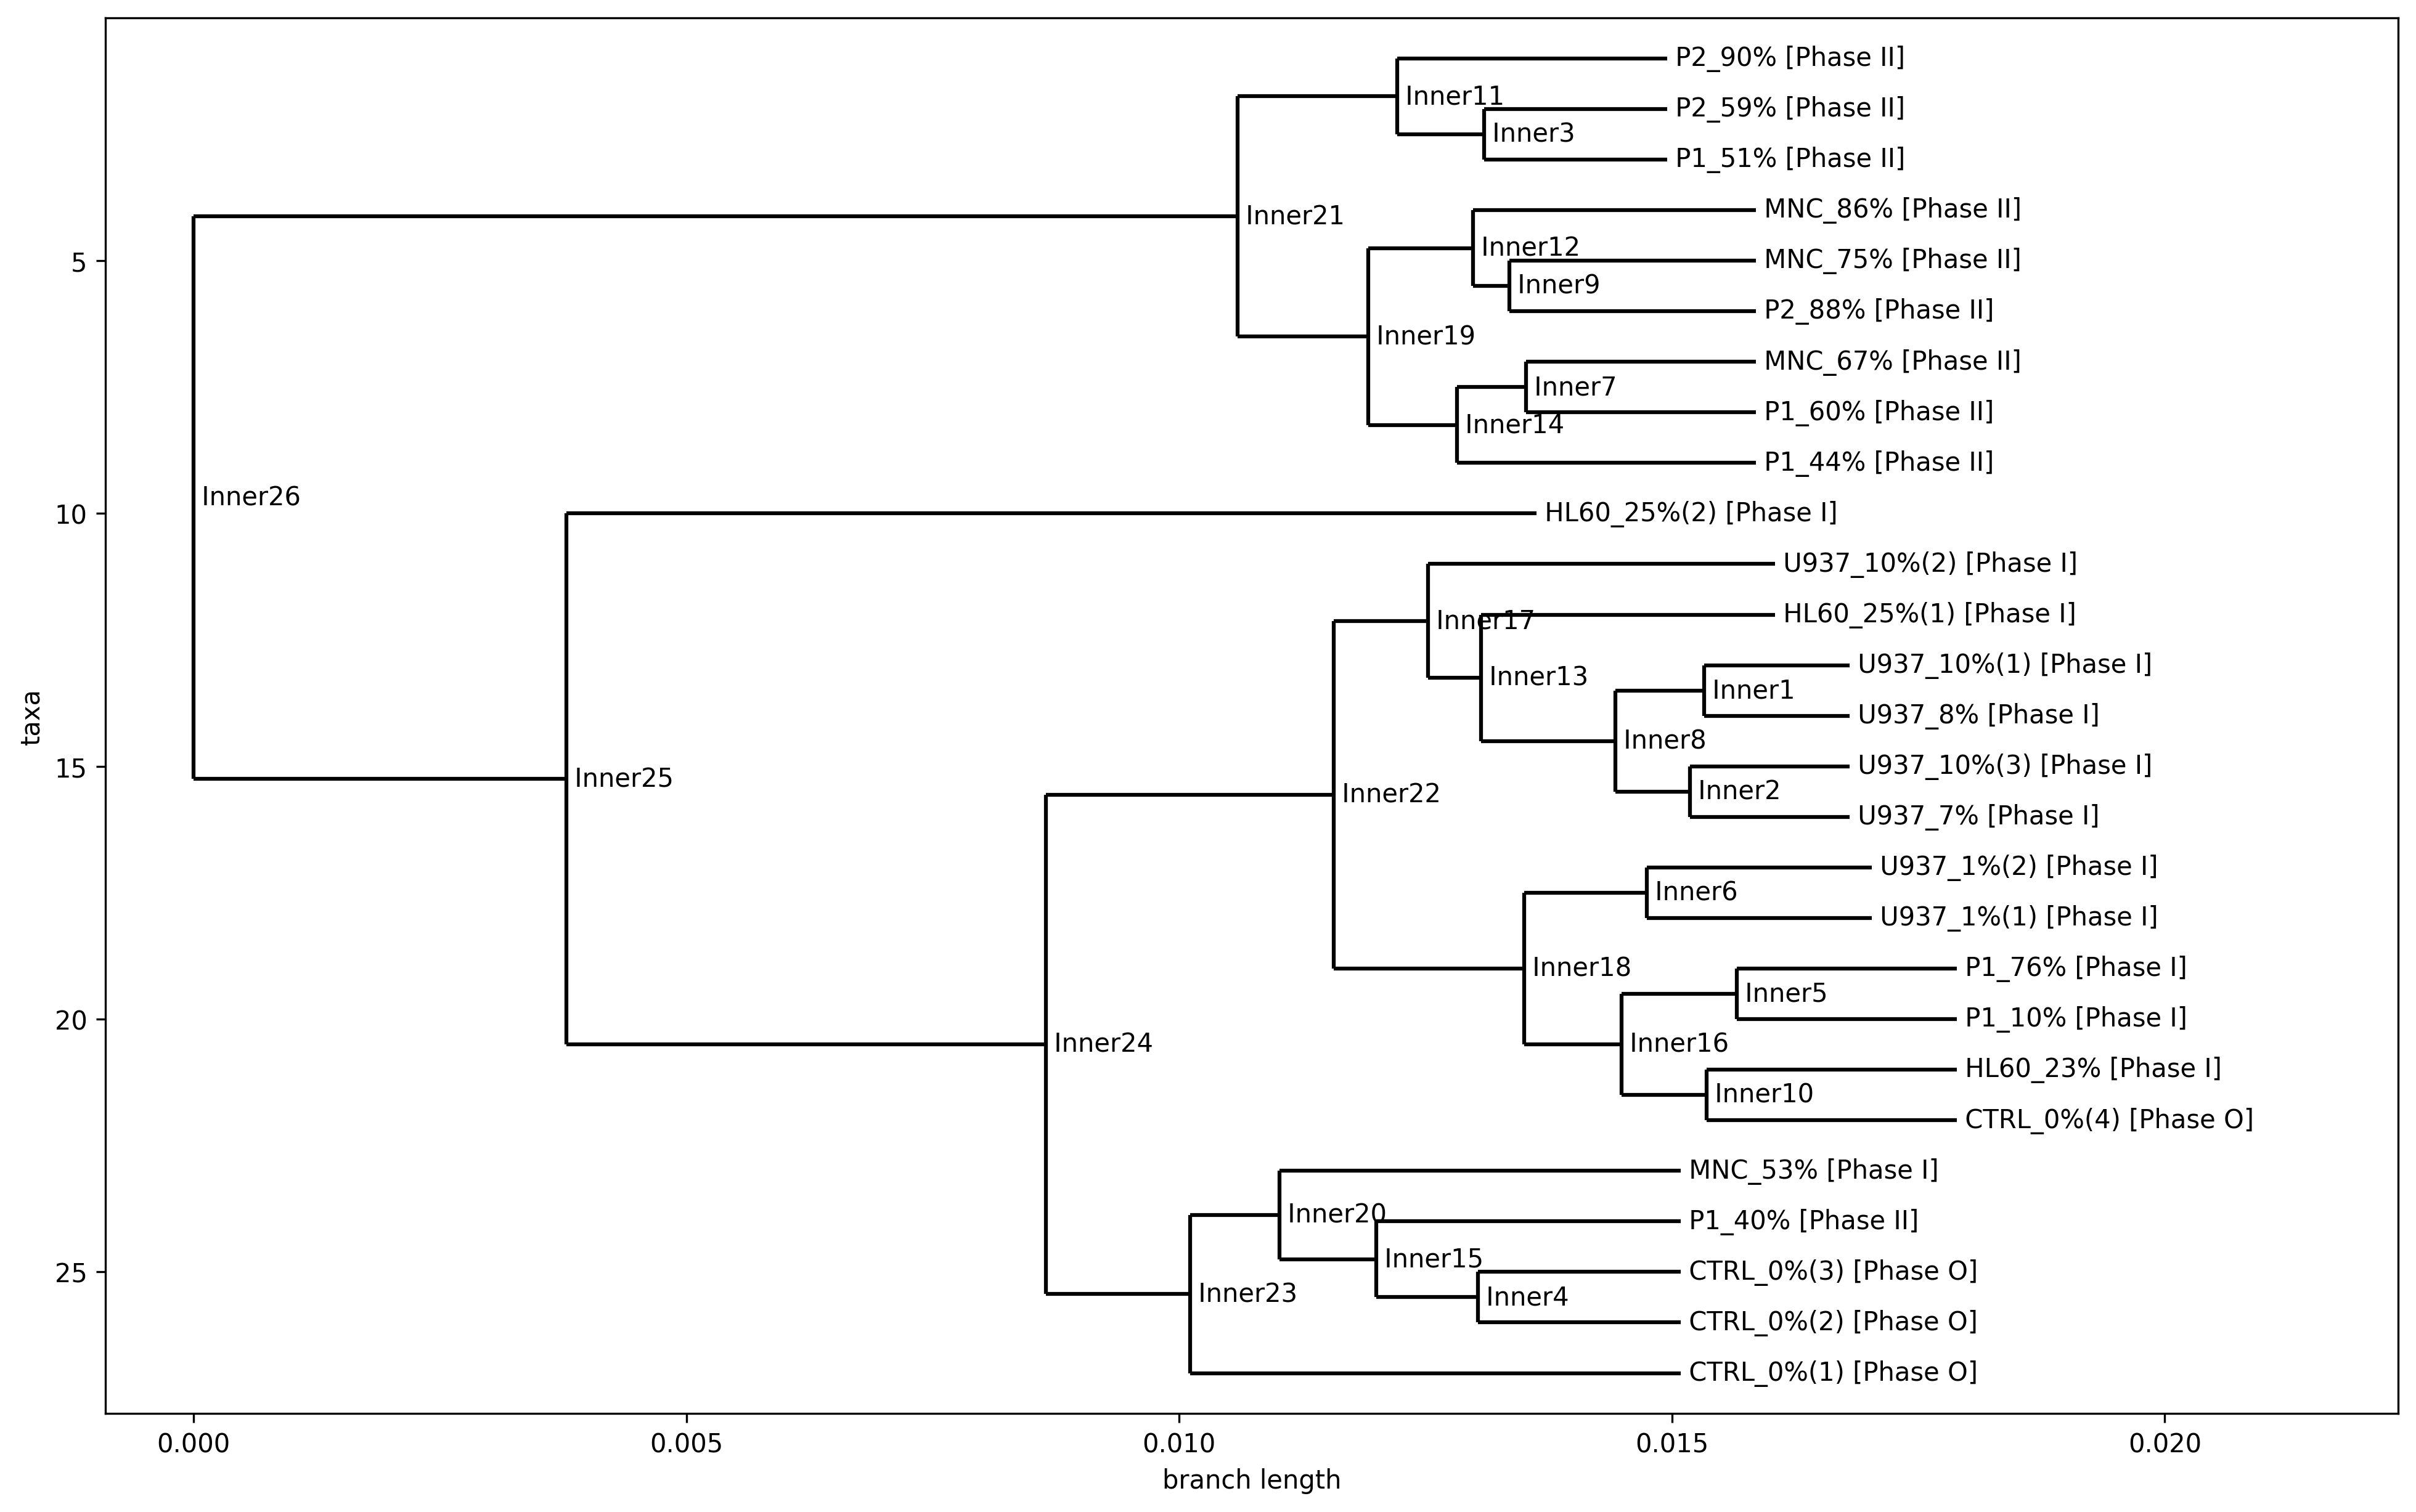

In [52]:
heatmap2_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i][2]-heatmaps_list[j][2]))
    heatmap2_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap2_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap2_distlist)
UPGMATree = constructor.upgma(heatmap2_distmat)
fig = plt.figure(figsize=(16,10), dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

In [53]:
# Ph1_nw heatmap tree

ph1_nw_heatmaps_list = []
ph1_nw = []
for i in datasets_of_interest:
    y = truncated_PH_all_datasets[i][truncated_PH_all_datasets[i][:,2]==1,:]
    ph1_nw.append(y[(y[:,0]<0) * (y[:,1]>0),:])

for i in range(27):
    ph1_nw_heatmaps_list.append(extract_PH_heatmaps_single_sample(ph1_nw[i], THR, WEIGHTS, SIGMA,
                                                XLIMS, YLIMS, NB_BINS_PER_SIDE,
                                                   discard_PH0_NW = False,
                                                   option = 'keops'))

excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points


In [54]:
# noramlize
for i in range(27):
    maps0 = ph1_nw_heatmaps_list[i][0]
    maps1 = ph1_nw_heatmaps_list[i][1]
    maps2 = ph1_nw_heatmaps_list[i][2]
    ph1_nw_heatmaps_list[i][0] = maps0/np.sum(maps0)
    ph1_nw_heatmaps_list[i][1] = maps1/np.sum(maps1)
    ph1_nw_heatmaps_list[i][2] = maps2/np.sum(maps2)

/home/qw817/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/qw817/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


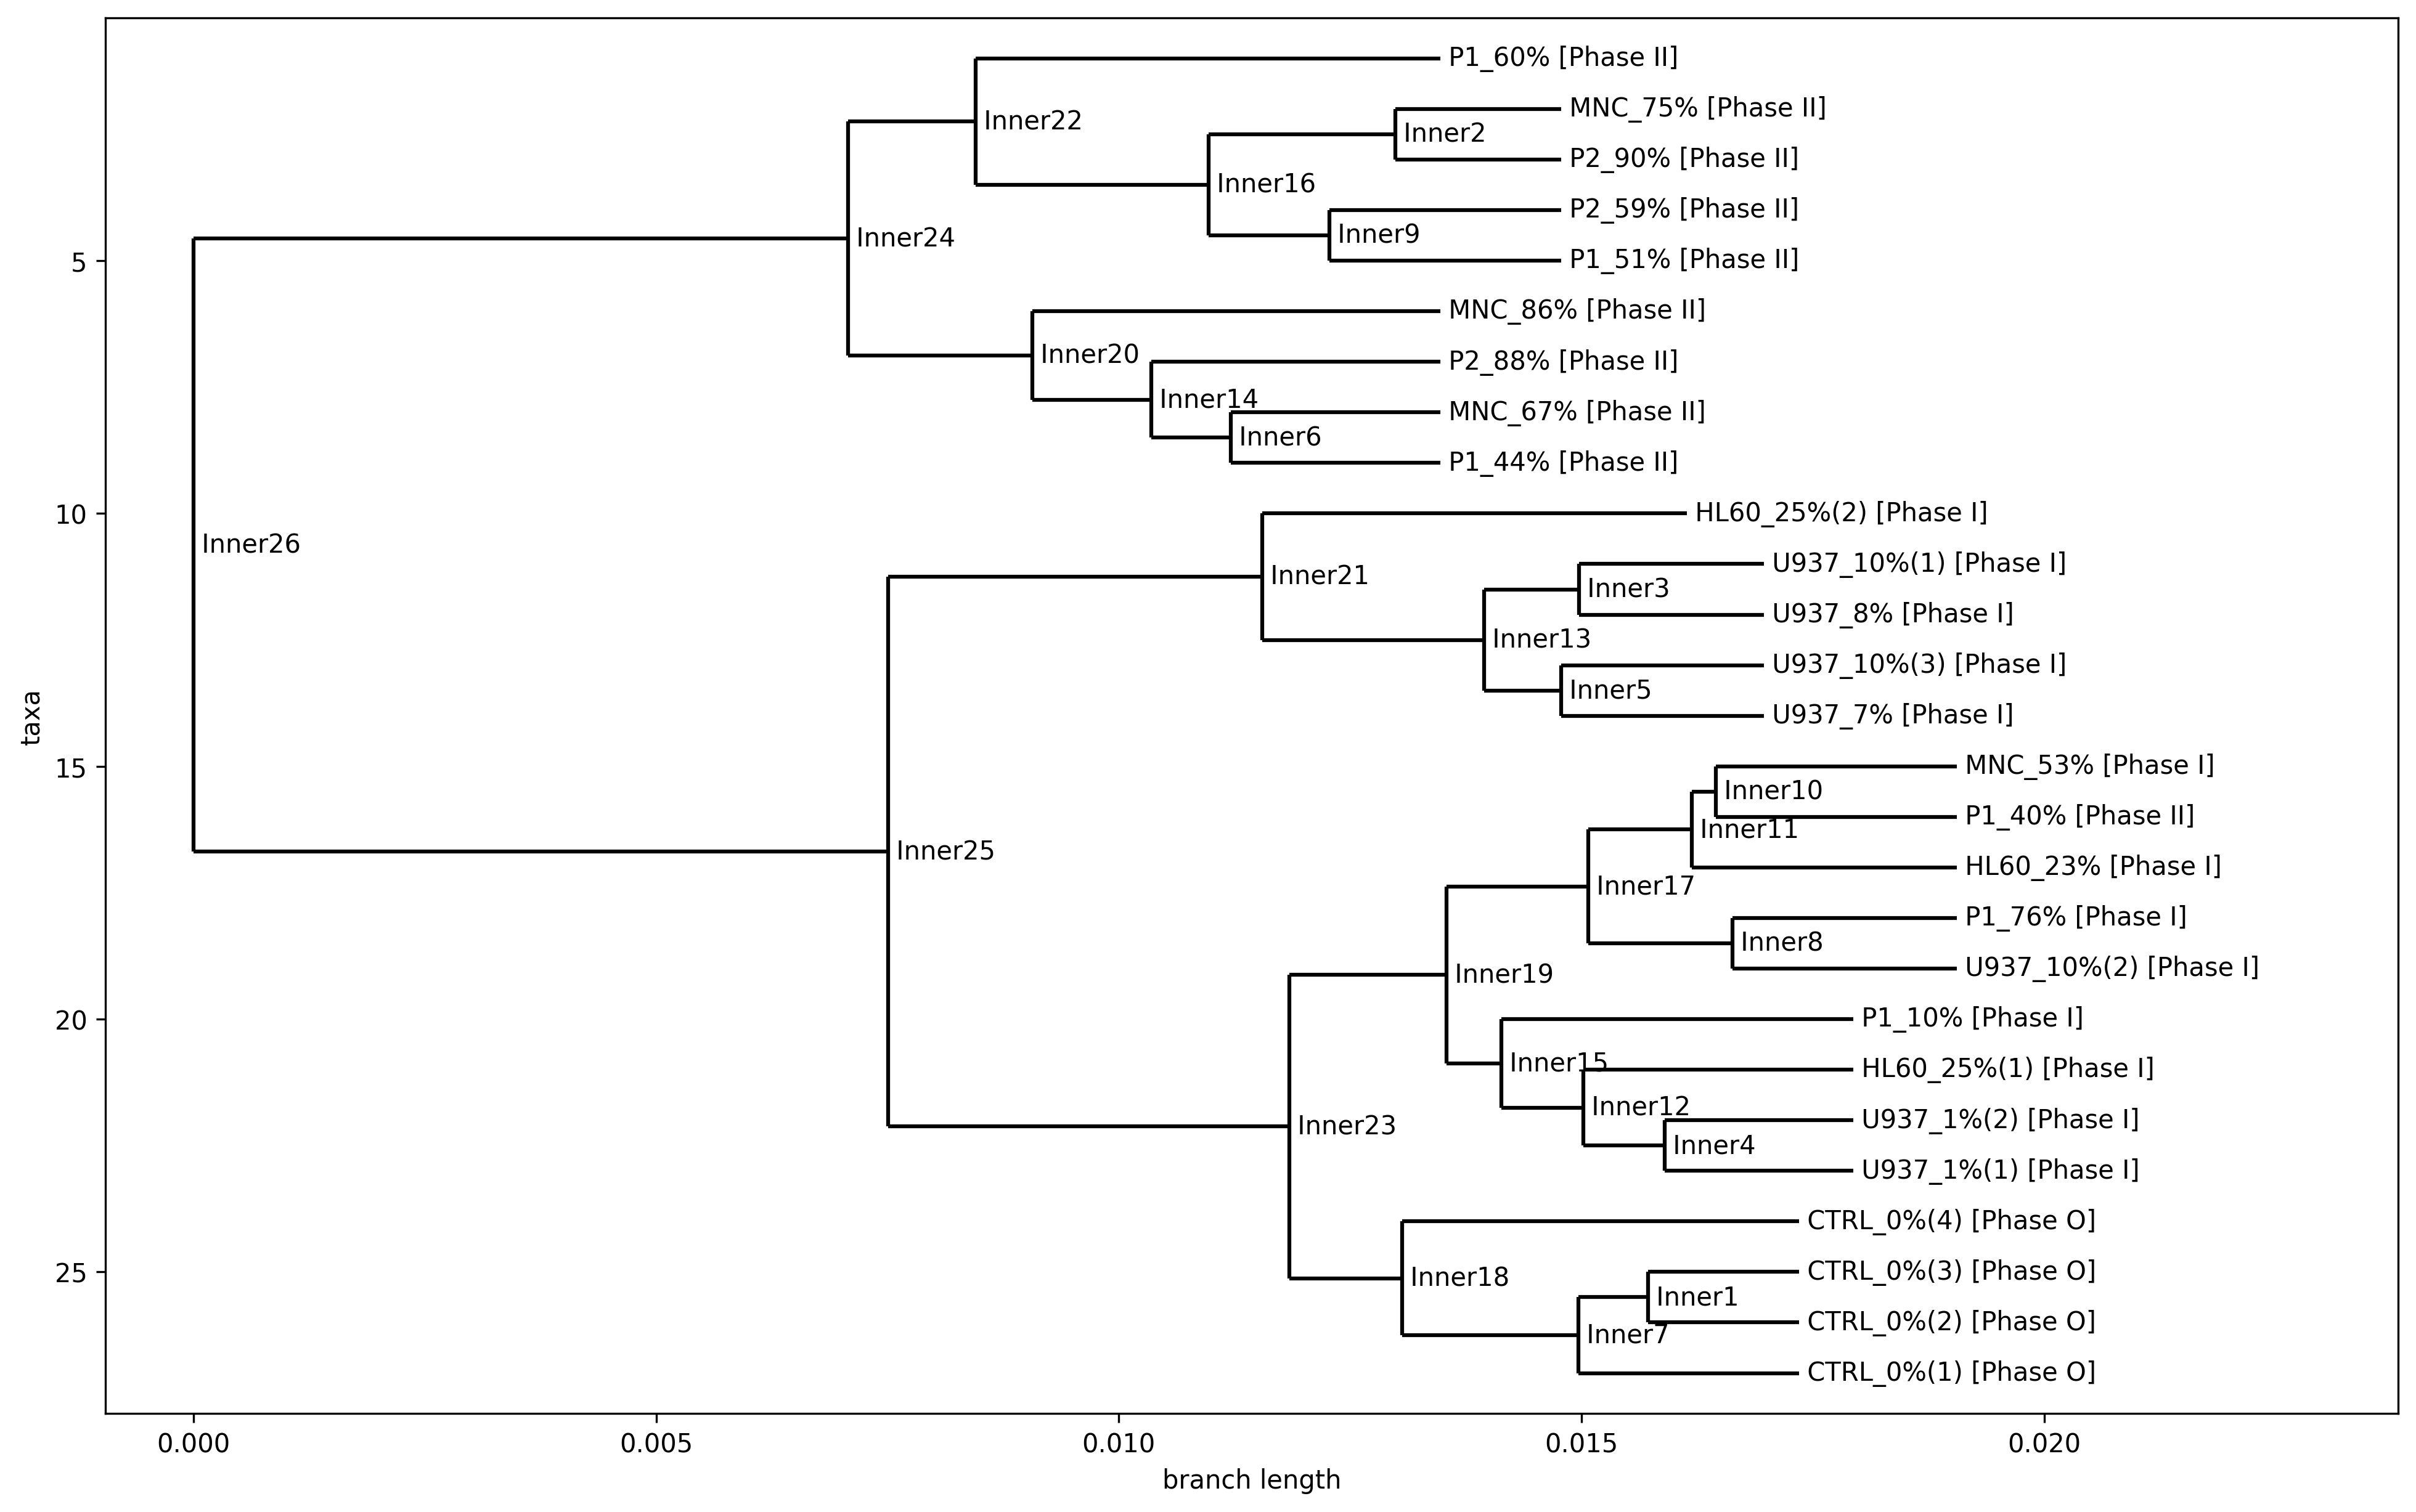

In [55]:
ph1nw_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(ph1_nw_heatmaps_list[i][1]-ph1_nw_heatmaps_list[j][1]))
    ph1nw_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
ph1nw_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, ph1nw_distlist)
UPGMATree = constructor.upgma(ph1nw_distmat)
fig = plt.figure(figsize=(16,10),dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

# Repeat to plot trees for long part

In [71]:
import numpy as np
import pickle

import sys
module_paths = ['']
for path in module_paths :
    if path not in sys.path:
        sys.path.append(path)

from utils_load_PHloc import (extract_PH_heatmaps_single_sample,
contour_heatmaps,
collect_paired_crit_sizes,
collect_indiv_crit_sizes)

from utils_load_PHloc import datasets_of_interest, injected_datasets_of_interest, levels_of_interest

# folder where you put the PHloc files
PH_folder = '' 

# choose desired anatomy: 'knee', 'long', 'both' (which is a merge of the birth-death points)
anatomy = 'long'

# load file
filepath = PH_folder + 'PH_all_{}.pkl'.format(anatomy)
print('I will load',filepath)
PH_all_datasets = pickle.load(open(filepath, 'rb'))


I will load PH_all_long.pkl


In [72]:
# threshold value
THR = .5

# generate a new dictionary for truncated datasets
truncated_PH_all_datasets = {}
for i in datasets_of_interest:
    diagram = PH_all_datasets[i]
    truncated_PH_all_datasets[i] = diagram[diagram[:,1] >= diagram[:,0] + THR]
    
# print size of the diagrams
for i in datasets_of_interest:
    diagram1 = PH_all_datasets[i]
    diagram2 = truncated_PH_all_datasets[i]
print("done")

done


In [73]:
names = [injected_datasets_of_interest[i]+"_"+[str(x) for x in datasets_of_interest][i] for i in range(27)]

In [74]:
labels = ['CTRL_0%(1)', 'CTRL_0%(2)', 'CTRL_0%(3)', 'CTRL_0%(4)', 
          'U937_1%(1)', 'U937_1%(2)', 'U937_7%', 'U937_8%', 'U937_10%(1)', 'U937_10%(2)', 'U937_10%(3)', 
          'HL60_23%', 'HL60_25%(1)', 'HL60_25%(2)', 
          'P1_10%', 'P1_40%', 'P1_44%', 'P1_51%', 'P1_60%', 'P1_76%', 
          'P2_59%', 'P2_88%', 'P2_90%', 
          'MNC_53%', 'MNC_67%', 'MNC_75%', 'MNC_86%']

# phases_of_interest = [0,0,0,0,
#          1,1,1,1,1,1,1,
#          1,1,1,
#          1,2,2,2,2,1,
#          2,2,2,
#          1,2,2,2]
 
phases_of_interest = ["O","O","O","O",
         "I","I","I","I","I","I","I",
         "I","I","I",
         "I","II","II","II","II","I",
         "II","II","II",
         "I","II","II","II"]

name_phase = [labels[i]+" [Phase "+phases_of_interest[i]+"]" for i in range(27)]


In [75]:
import matplotlib.pyplot as plt

################ PARAMETERS

# default values used: WEIGHTS = True (dirac masses weighted by persistence) ; SIGMA = .5

WEIGHTS = True
SIGMA = .5

# Binning parameters
XLIMS = np.array([[-15,0],[-10,10],[0,20]])
YLIMS = np.array([[-8,7],[-5,15],[0,20]])
NB_BINS_PER_SIDE = 100

heatmaps_list = []
for i in datasets_of_interest:
    heatmaps_list.append(extract_PH_heatmaps_single_sample(truncated_PH_all_datasets[i], THR, WEIGHTS, SIGMA,
                                                XLIMS, YLIMS, NB_BINS_PER_SIDE,
                                                   discard_PH0_NW = False,
                                                   option = 'keops'))

excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points


In [76]:
# noramlize
for i in range(27):
    maps0 = heatmaps_list[i][0]
    maps1 = heatmaps_list[i][1]
    maps2 = heatmaps_list[i][2]
    heatmaps_list[i][0] = maps0/np.sum(maps0)
    heatmaps_list[i][1] = maps1/np.sum(maps1)
    heatmaps_list[i][2] = maps2/np.sum(maps2)

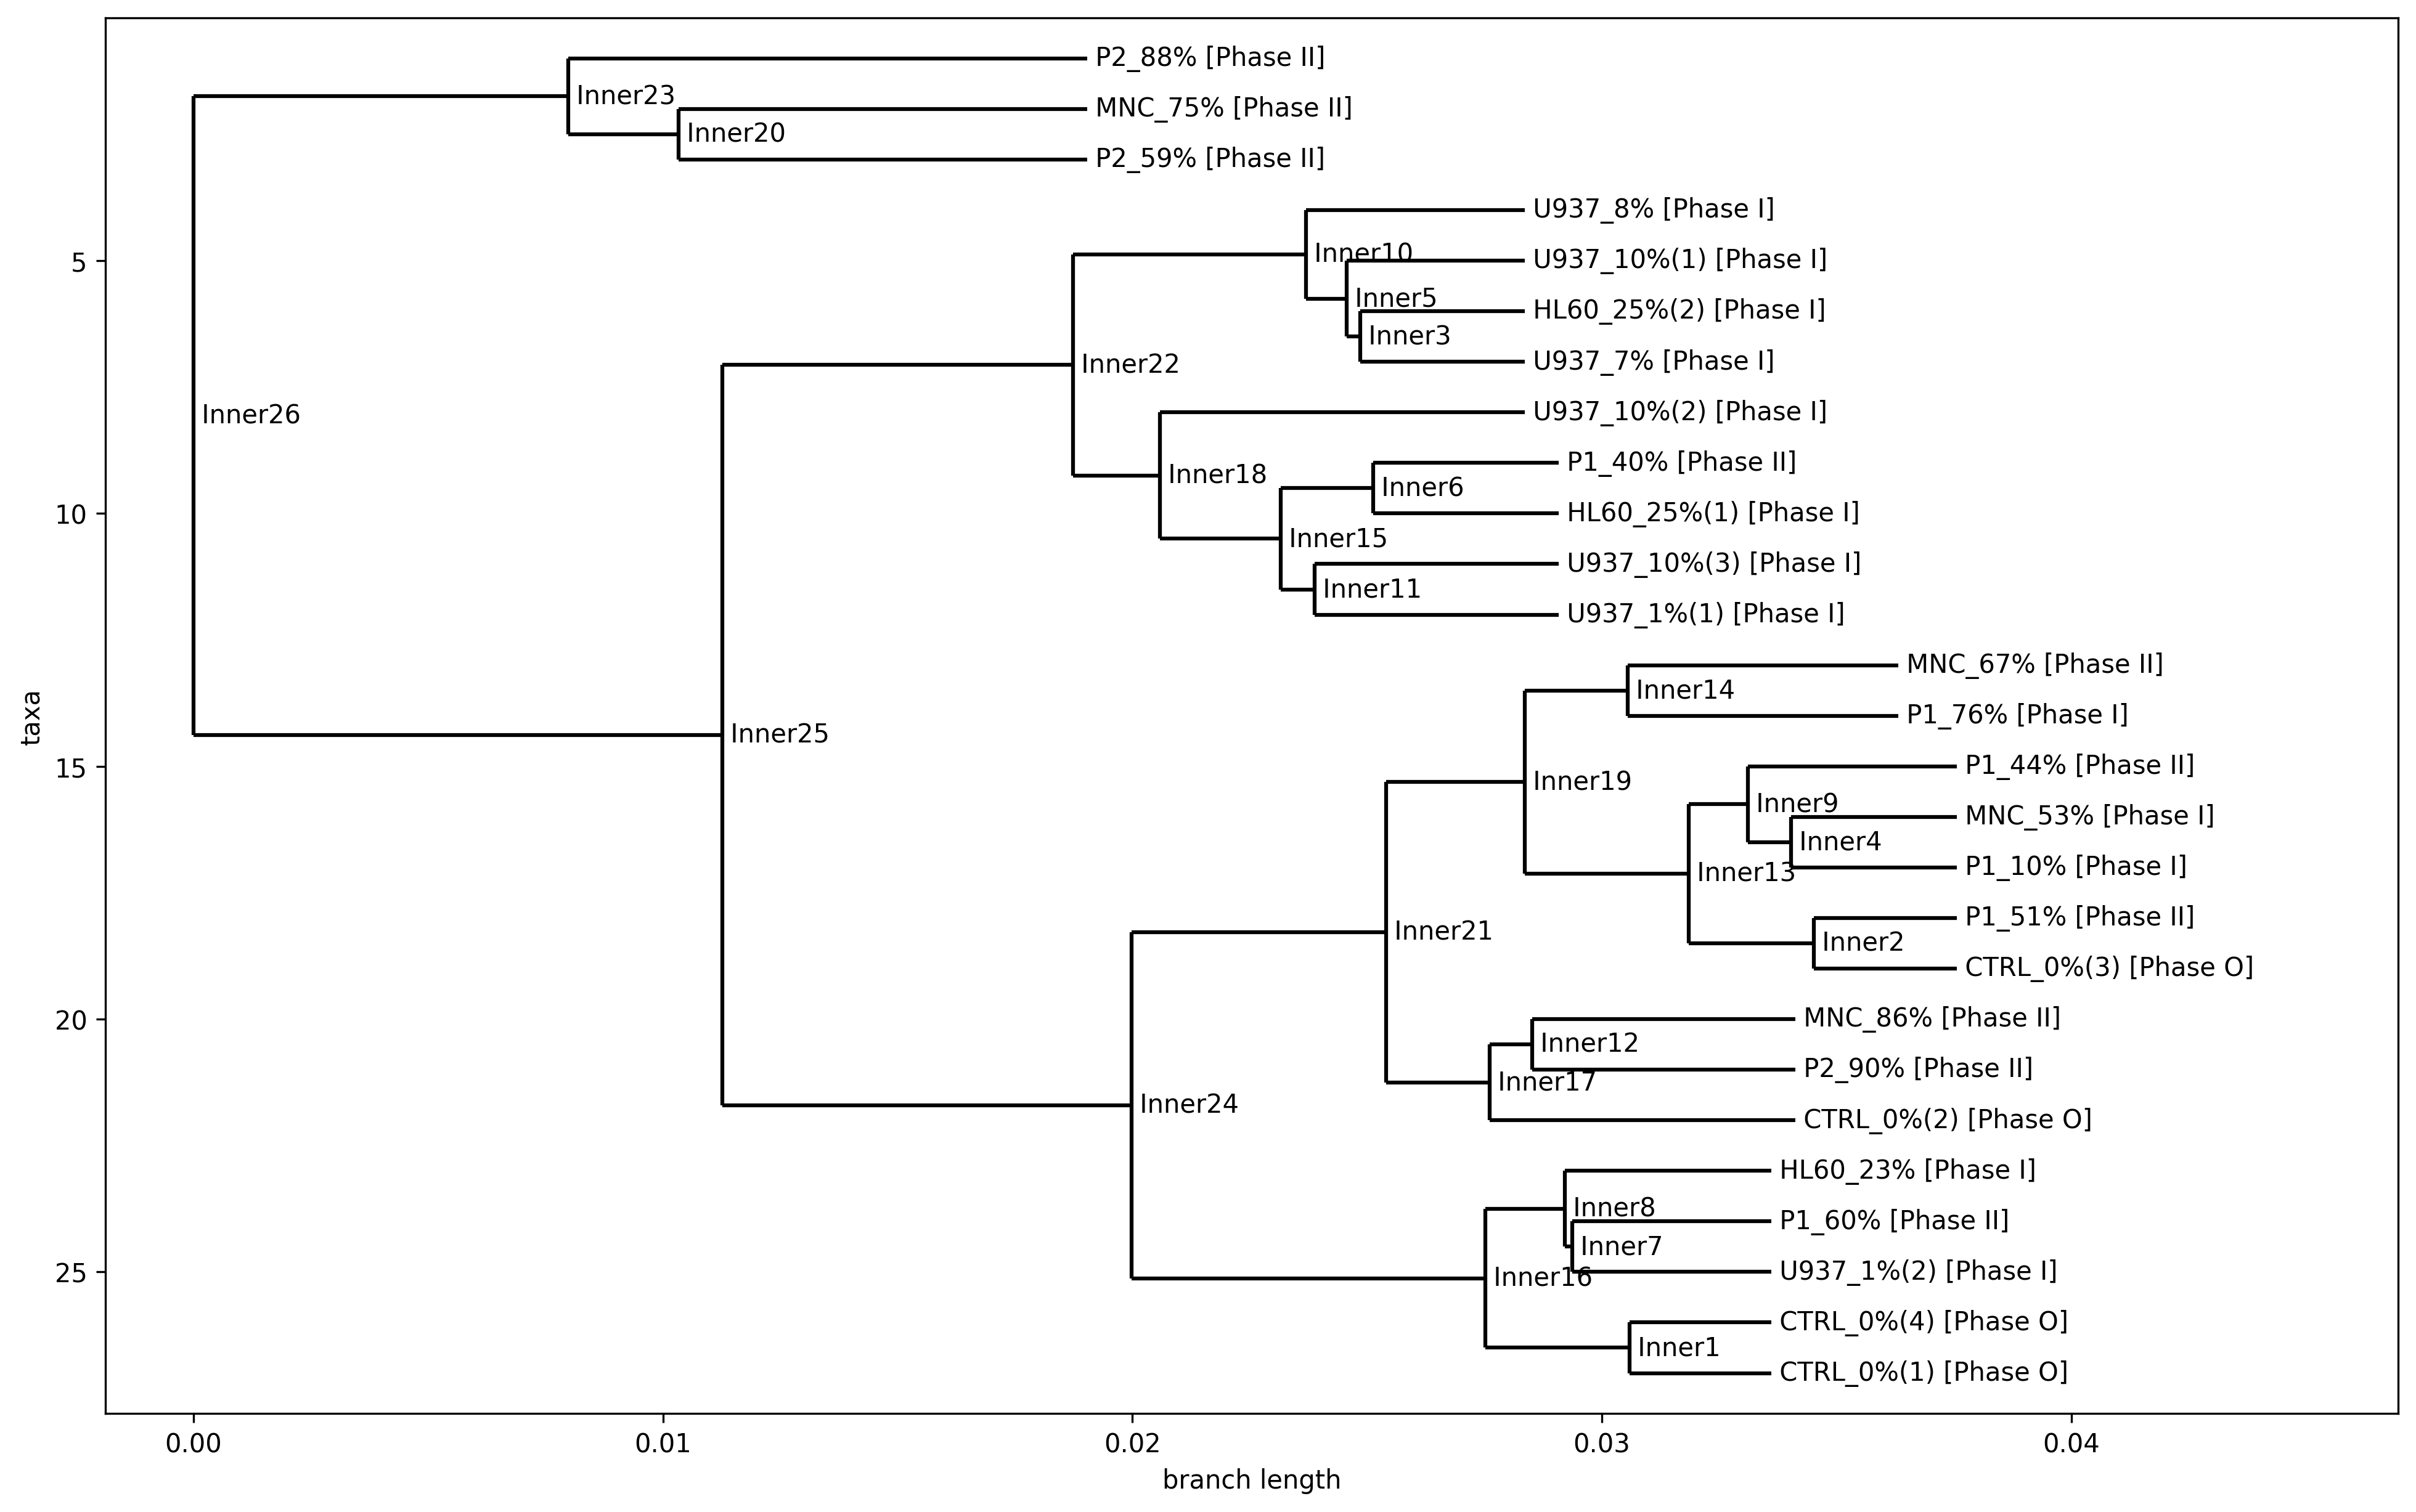

In [77]:
# Importing necessary libraries from BioPython
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor


heatmap_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i]-heatmaps_list[j]))
    heatmap_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap_distlist)
UPGMATree = constructor.upgma(heatmap_distmat)
fig = plt.figure(figsize=(16,10), dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

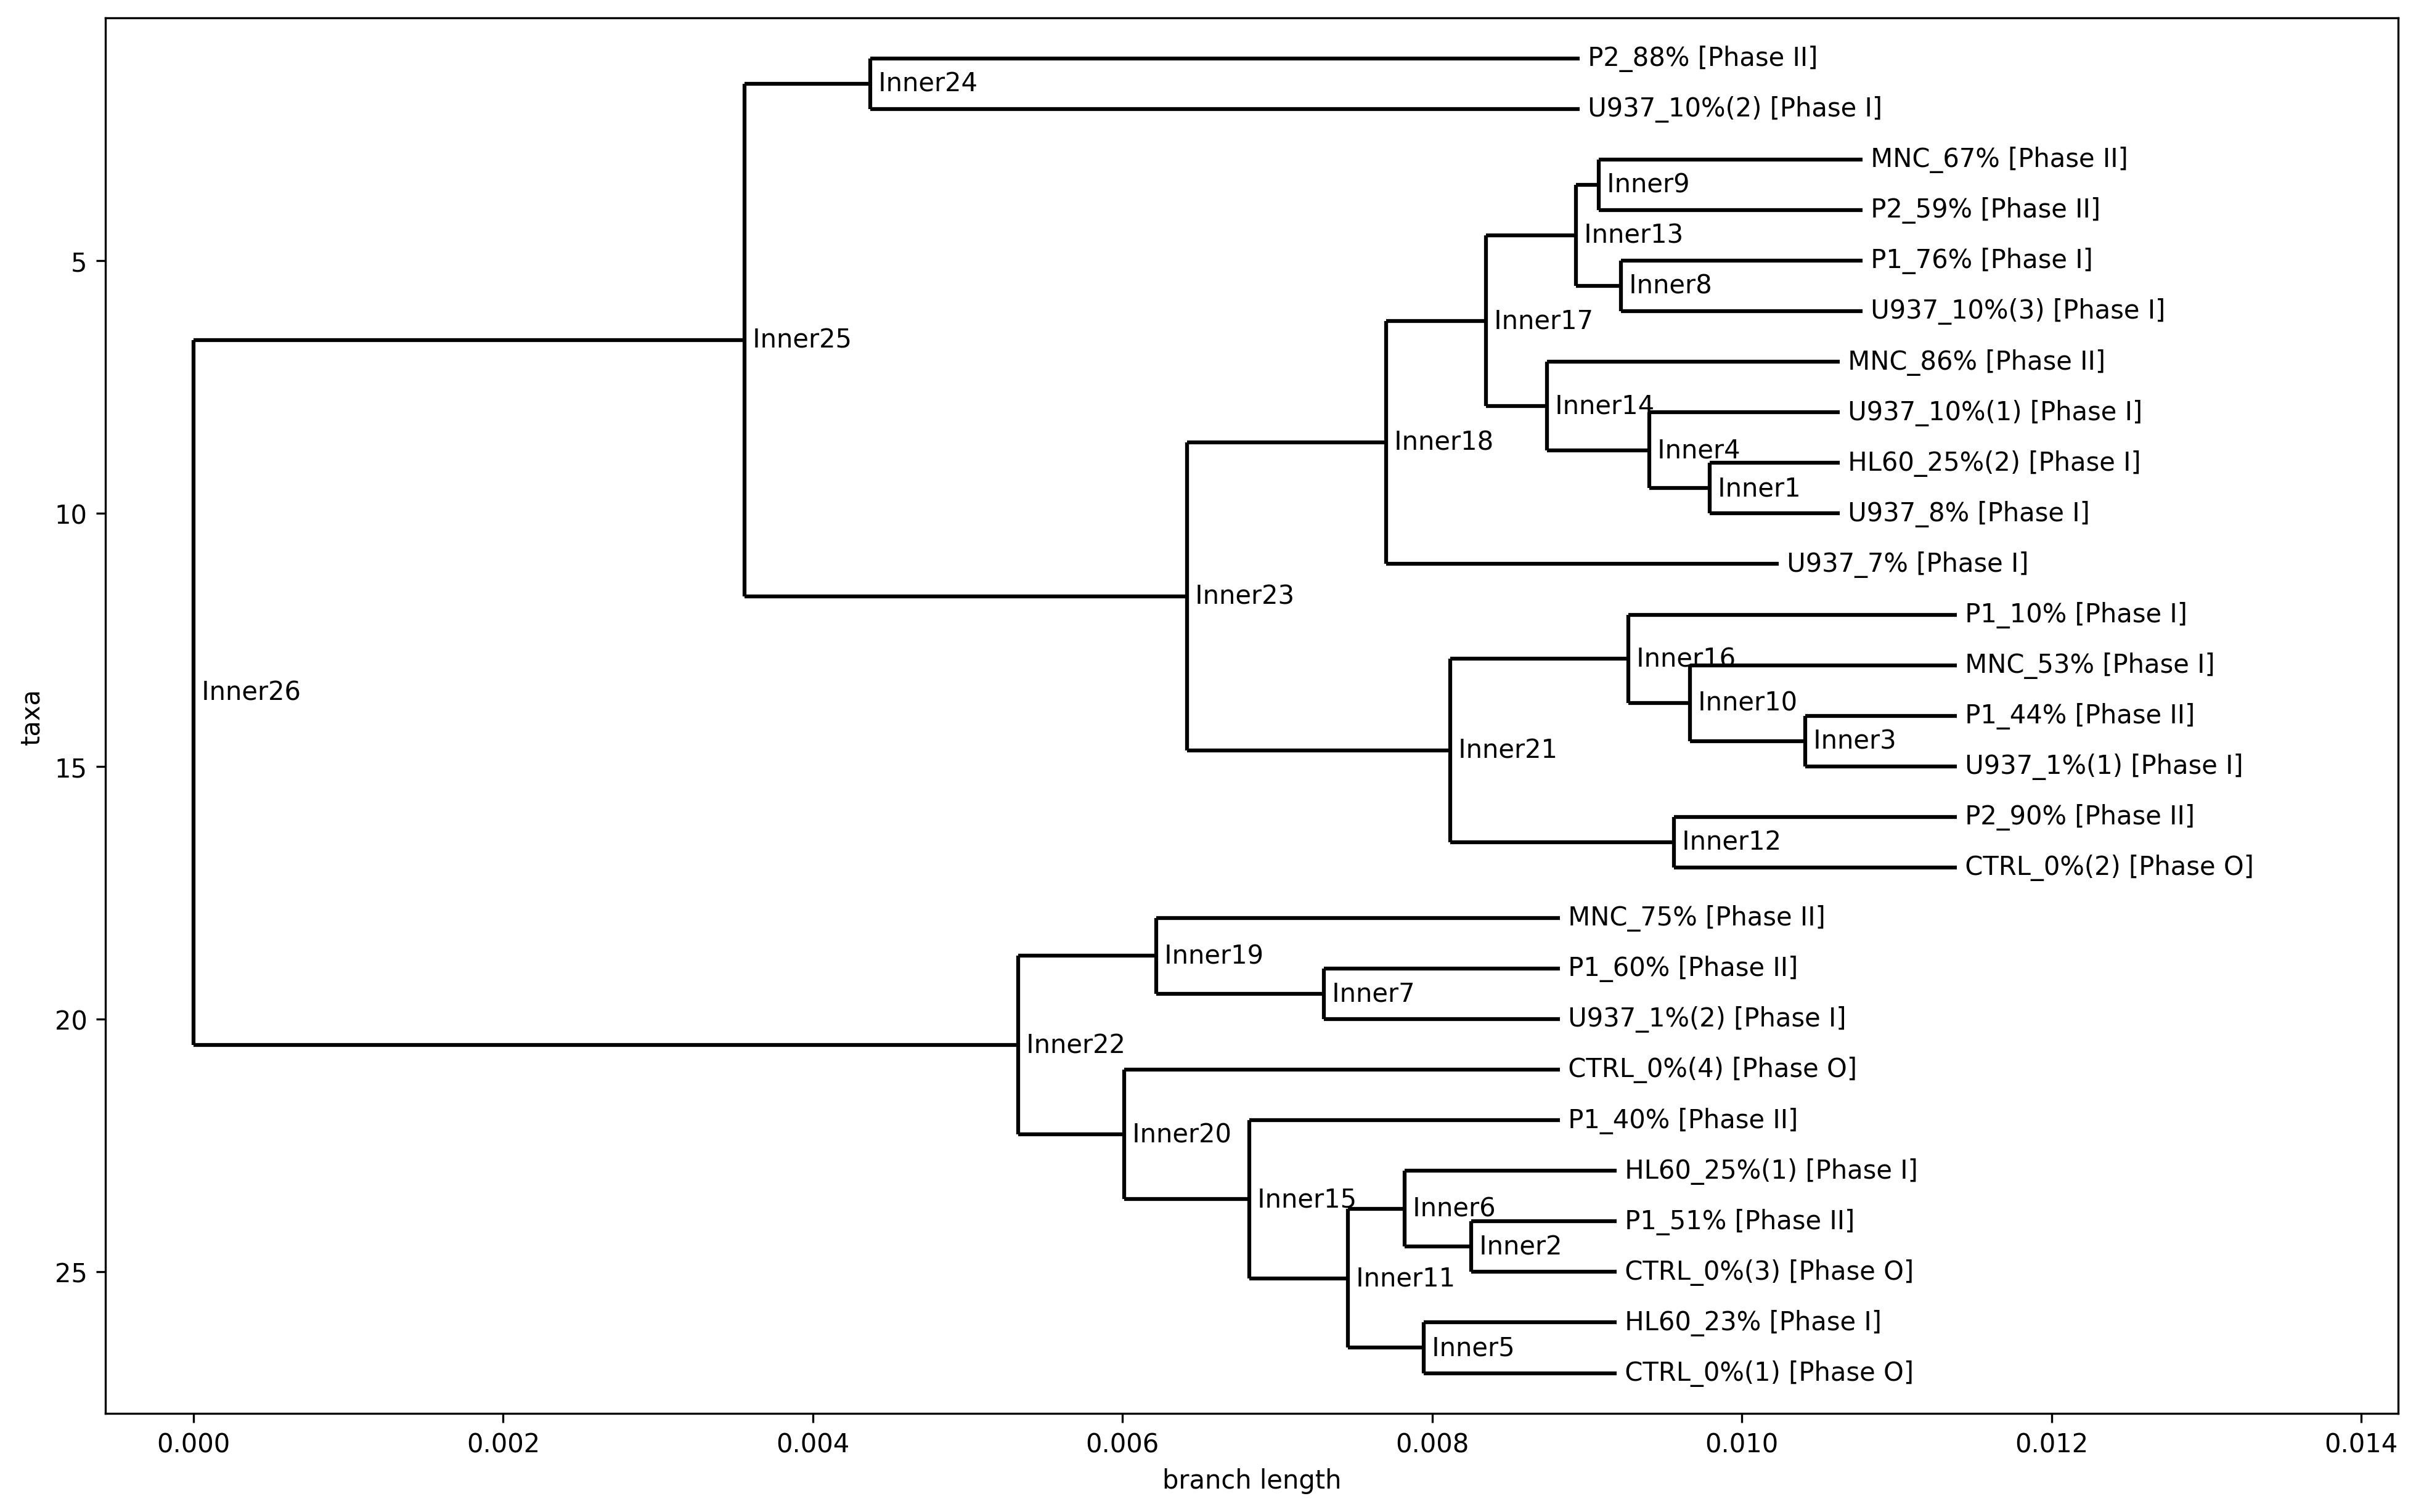

In [78]:
heatmap0_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i][0]-heatmaps_list[j][0]))
    heatmap0_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap0_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap0_distlist)
UPGMATree = constructor.upgma(heatmap0_distmat)
fig = plt.figure(figsize=(16,10), dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

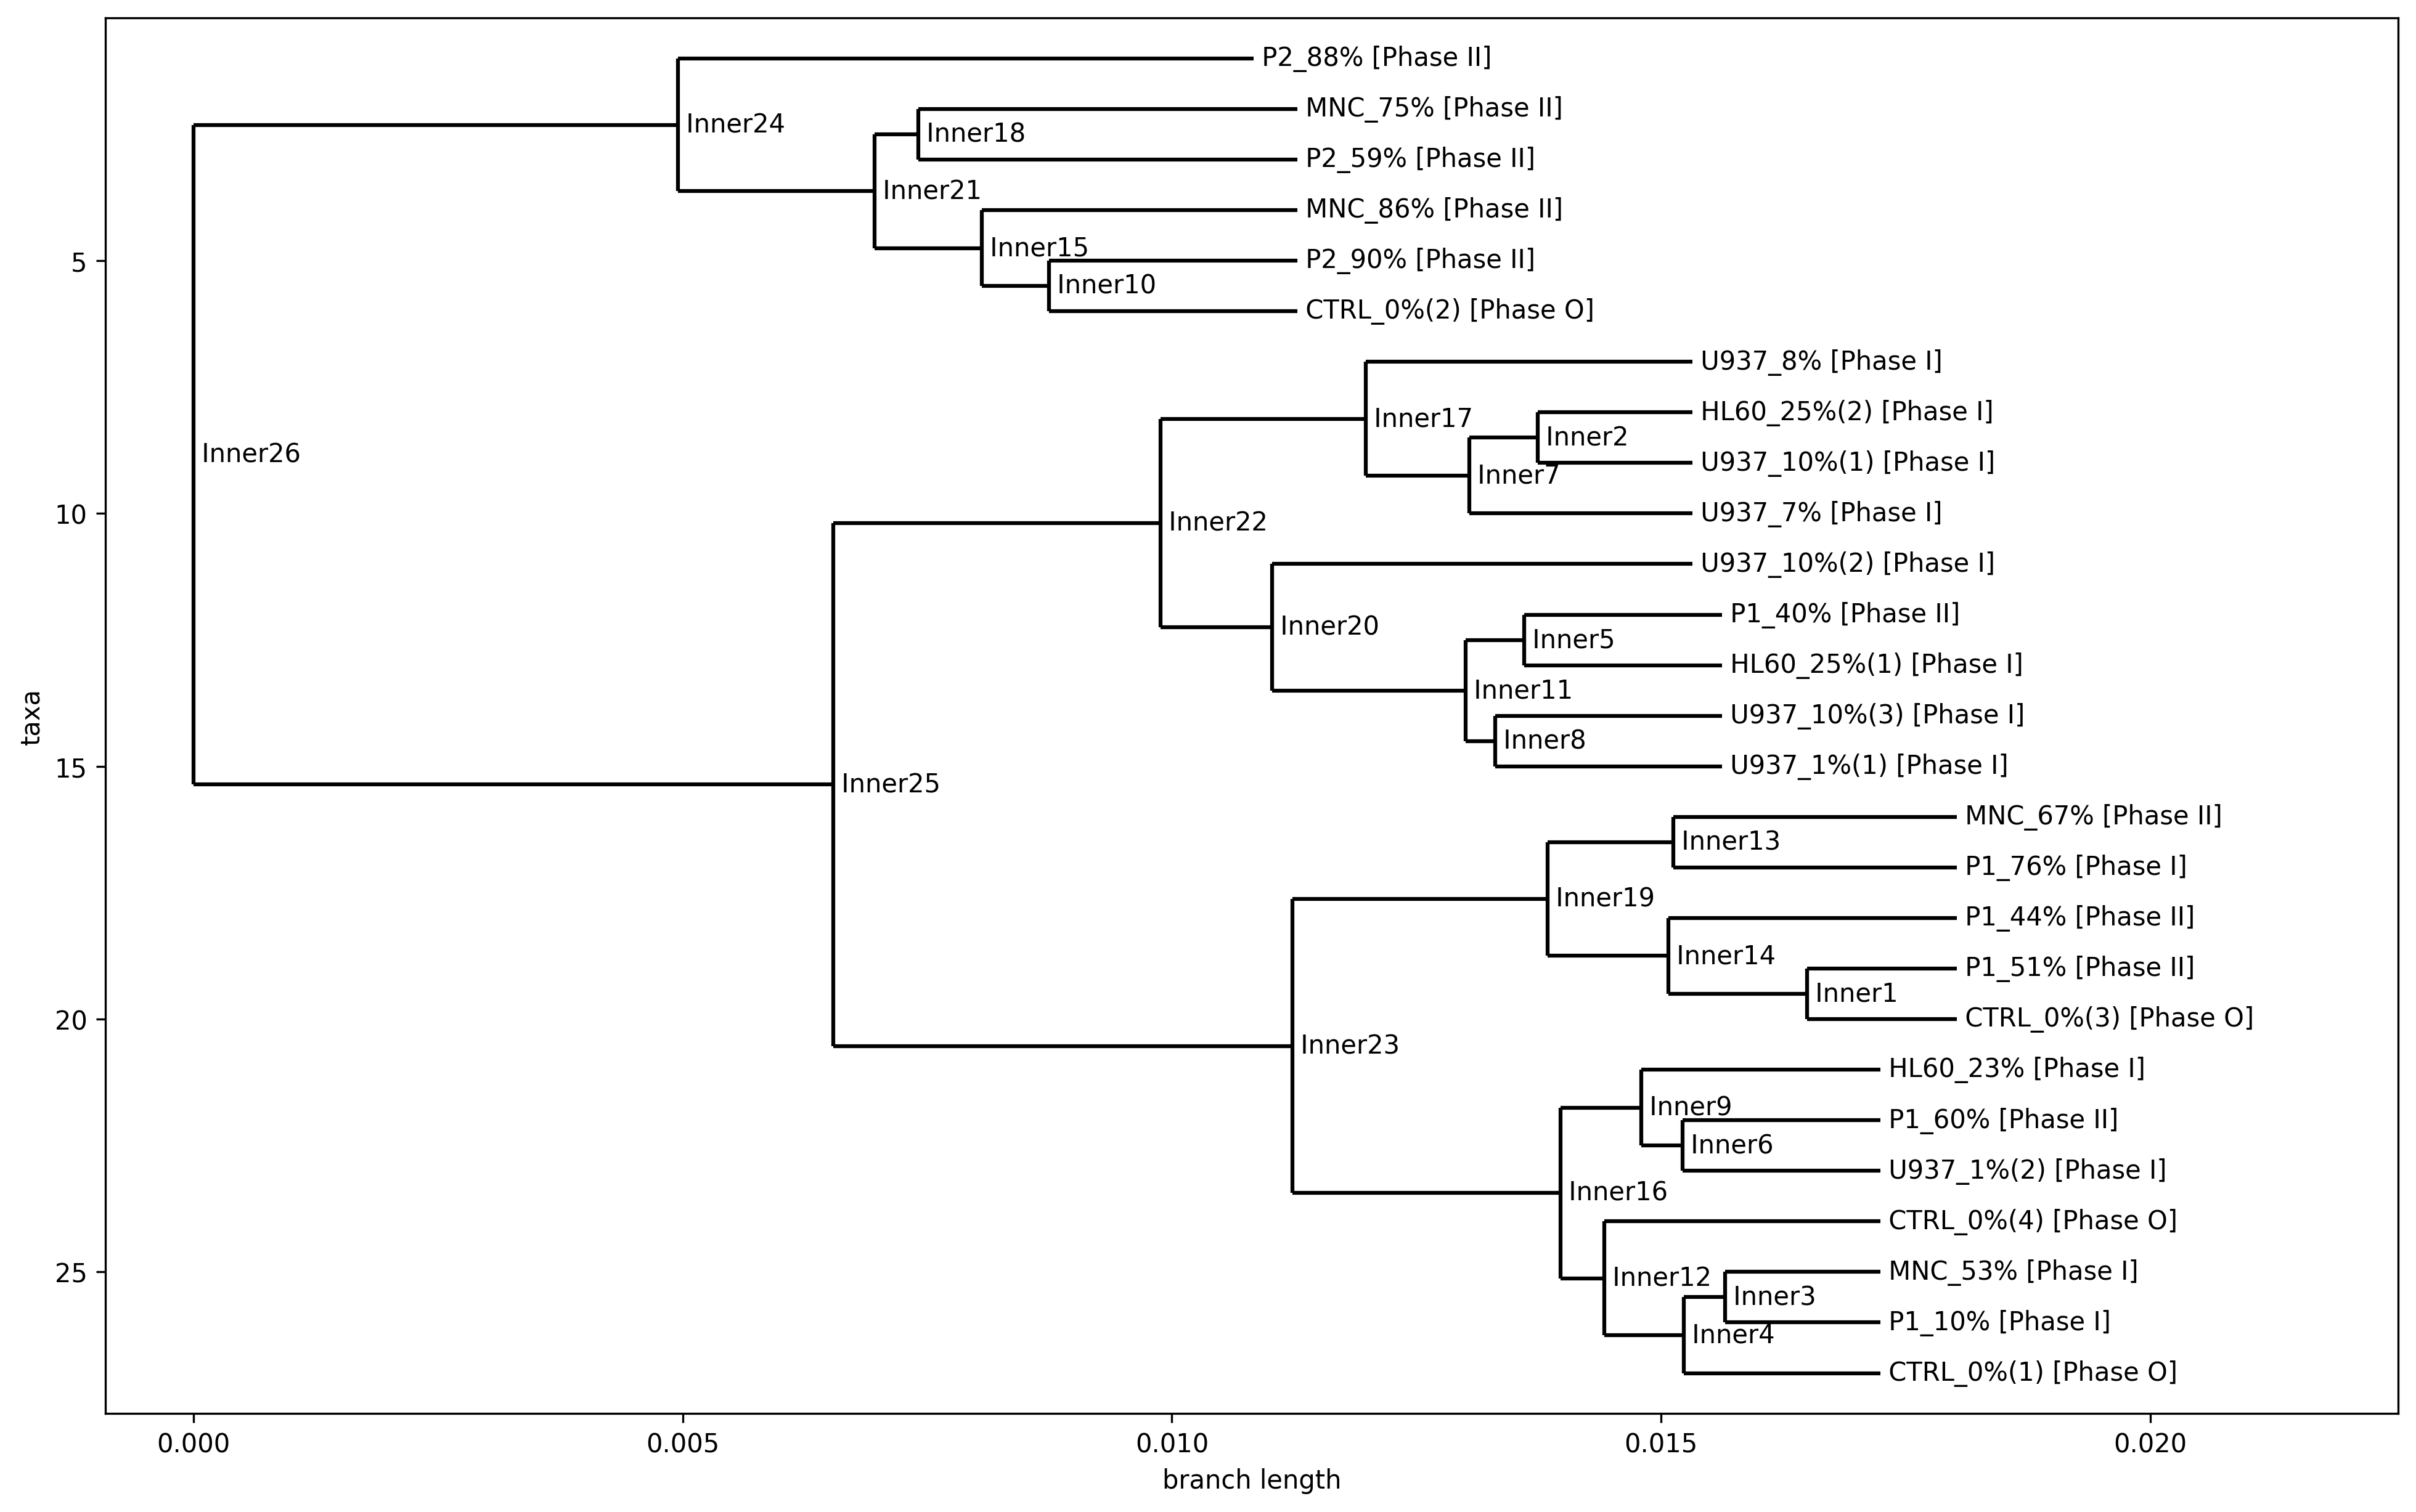

In [79]:
heatmap1_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i][1]-heatmaps_list[j][1]))
    heatmap1_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap1_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap1_distlist)
UPGMATree = constructor.upgma(heatmap1_distmat)
fig = plt.figure(figsize=(16,10),dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

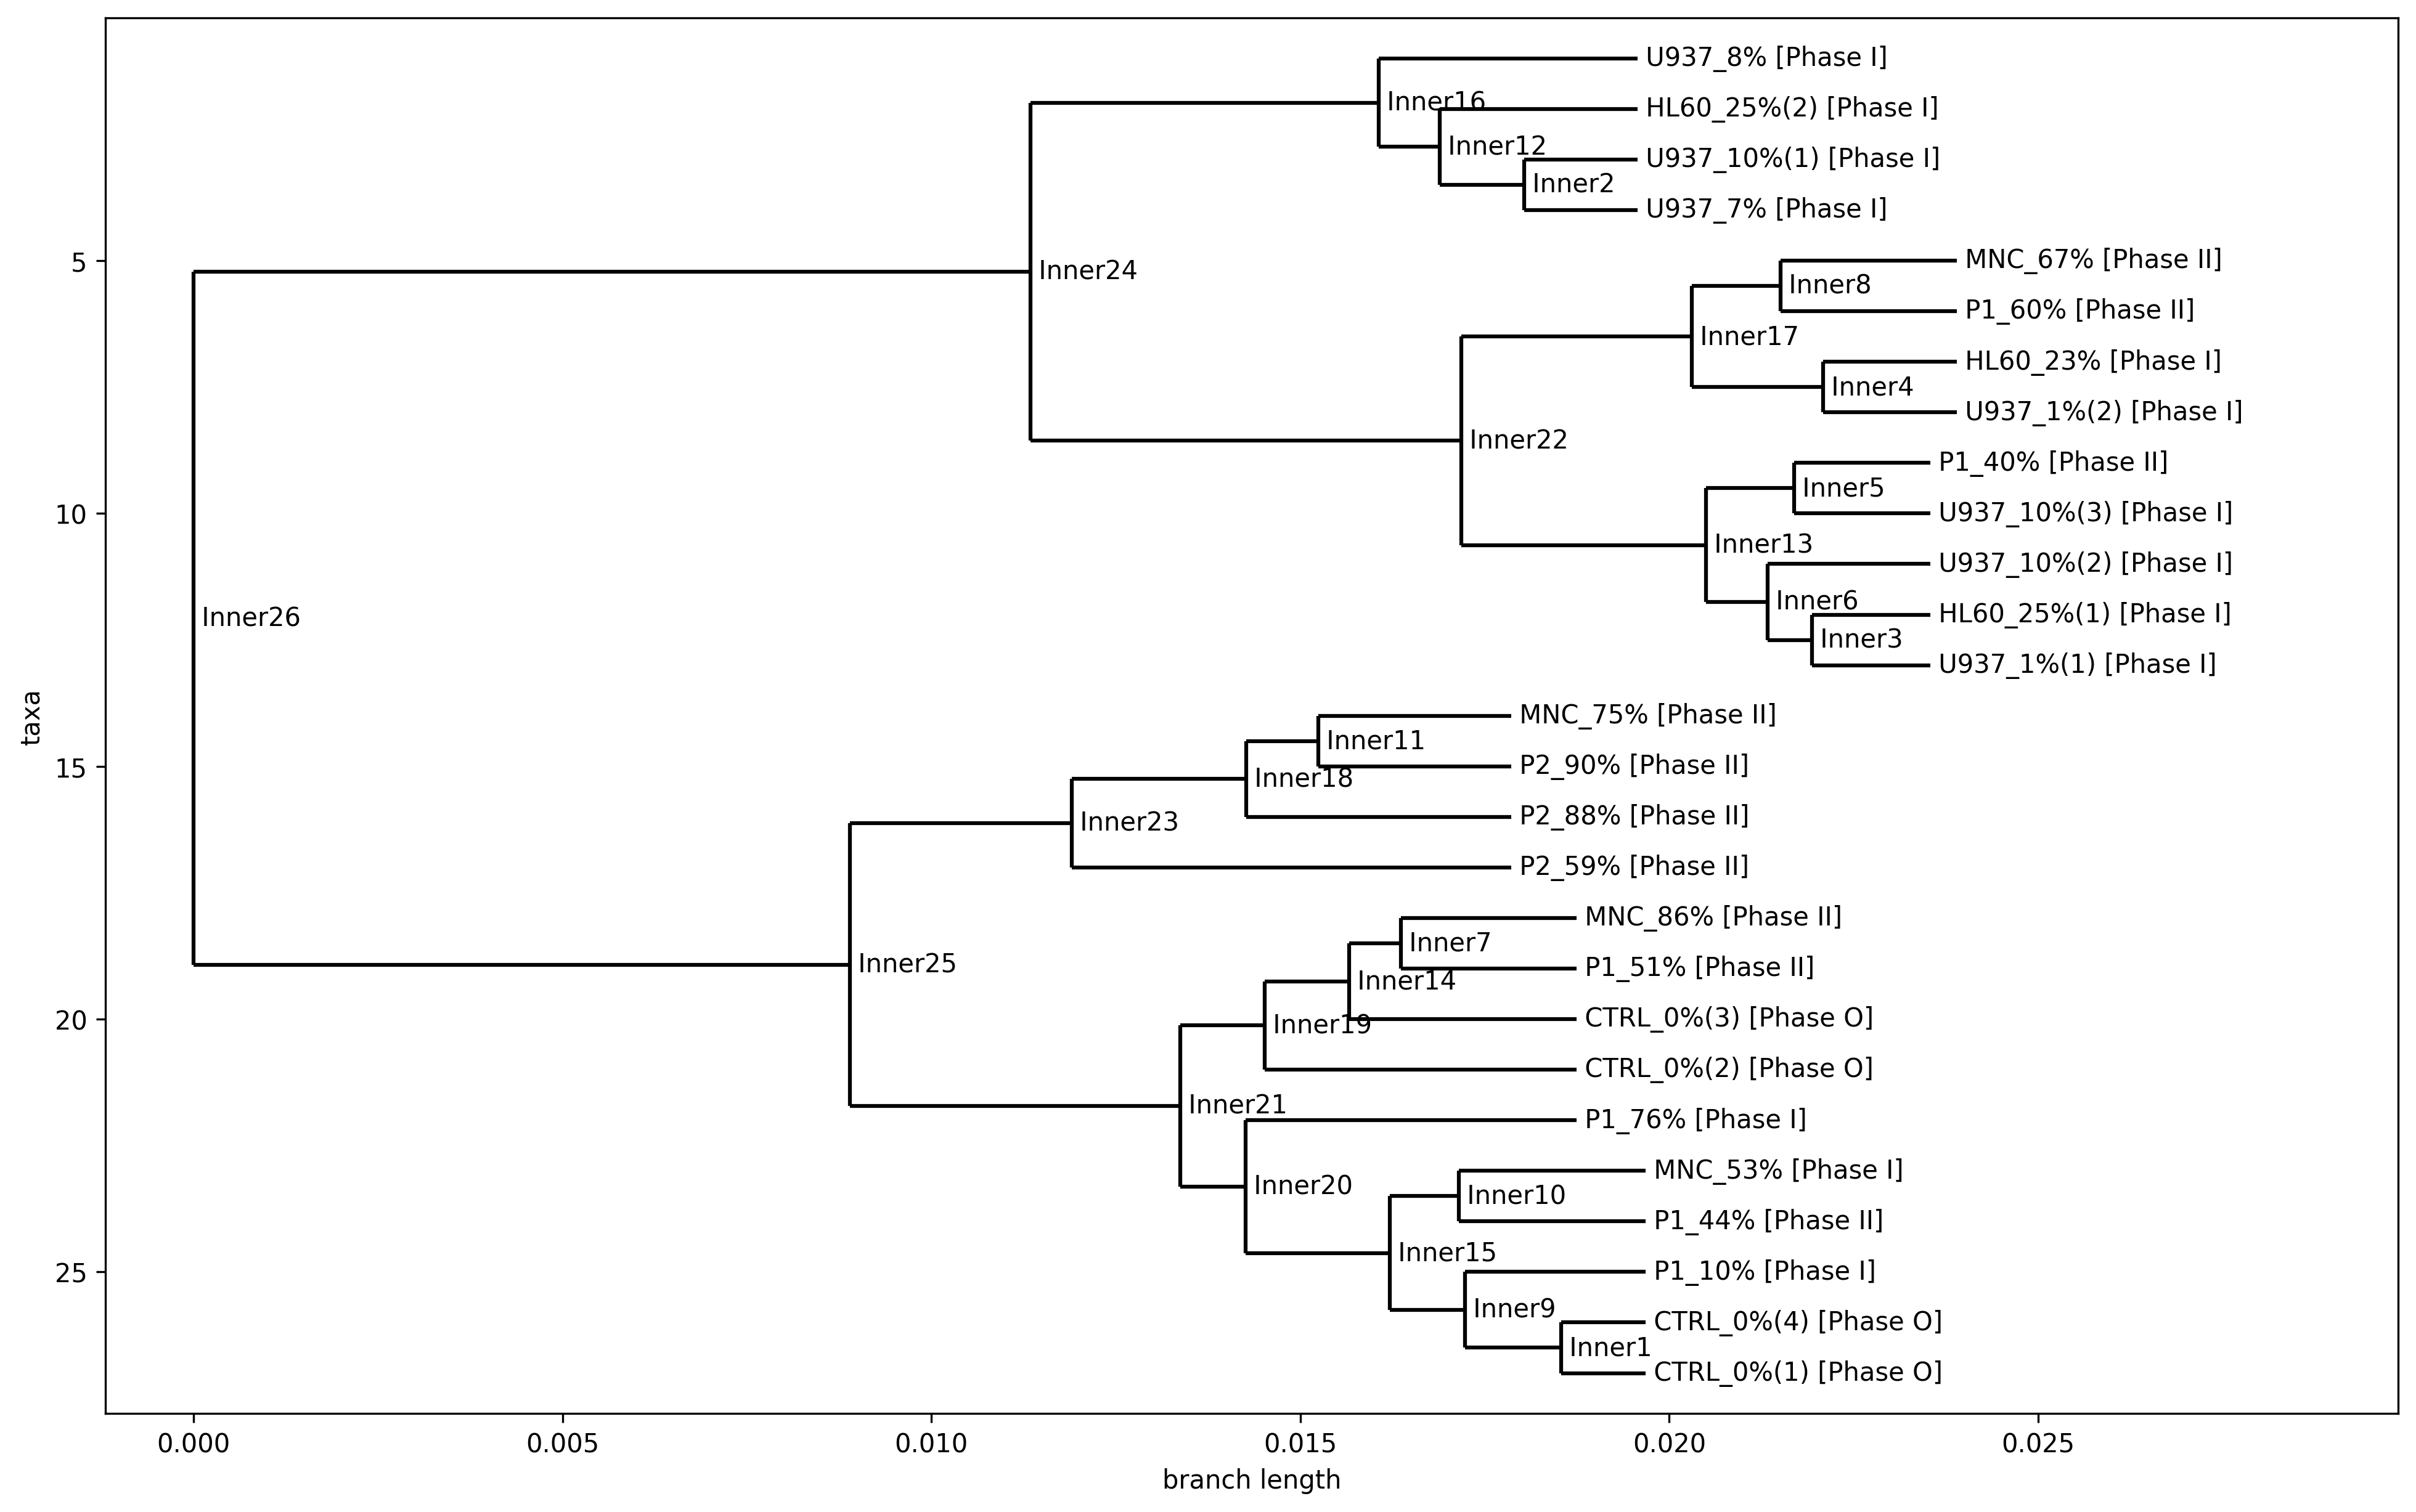

In [80]:
heatmap2_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i][2]-heatmaps_list[j][2]))
    heatmap2_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap2_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap2_distlist)
UPGMATree = constructor.upgma(heatmap2_distmat)
fig = plt.figure(figsize=(16,10), dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

In [81]:
# Ph1_nw heatmap tree

ph1_nw_heatmaps_list = []
ph1_nw = []
for i in datasets_of_interest:
    y = truncated_PH_all_datasets[i][truncated_PH_all_datasets[i][:,2]==1,:]
    ph1_nw.append(y[(y[:,0]<0) * (y[:,1]>0),:])

for i in range(27):
    ph1_nw_heatmaps_list.append(extract_PH_heatmaps_single_sample(ph1_nw[i], THR, WEIGHTS, SIGMA,
                                                XLIMS, YLIMS, NB_BINS_PER_SIDE,
                                                   discard_PH0_NW = False,
                                                   option = 'keops'))

excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points


In [82]:
# noramlize
for i in range(27):
    maps0 = ph1_nw_heatmaps_list[i][0]
    maps1 = ph1_nw_heatmaps_list[i][1]
    maps2 = ph1_nw_heatmaps_list[i][2]
    ph1_nw_heatmaps_list[i][0] = maps0/np.sum(maps0)
    ph1_nw_heatmaps_list[i][1] = maps1/np.sum(maps1)
    ph1_nw_heatmaps_list[i][2] = maps2/np.sum(maps2)

/home/qw817/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/qw817/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


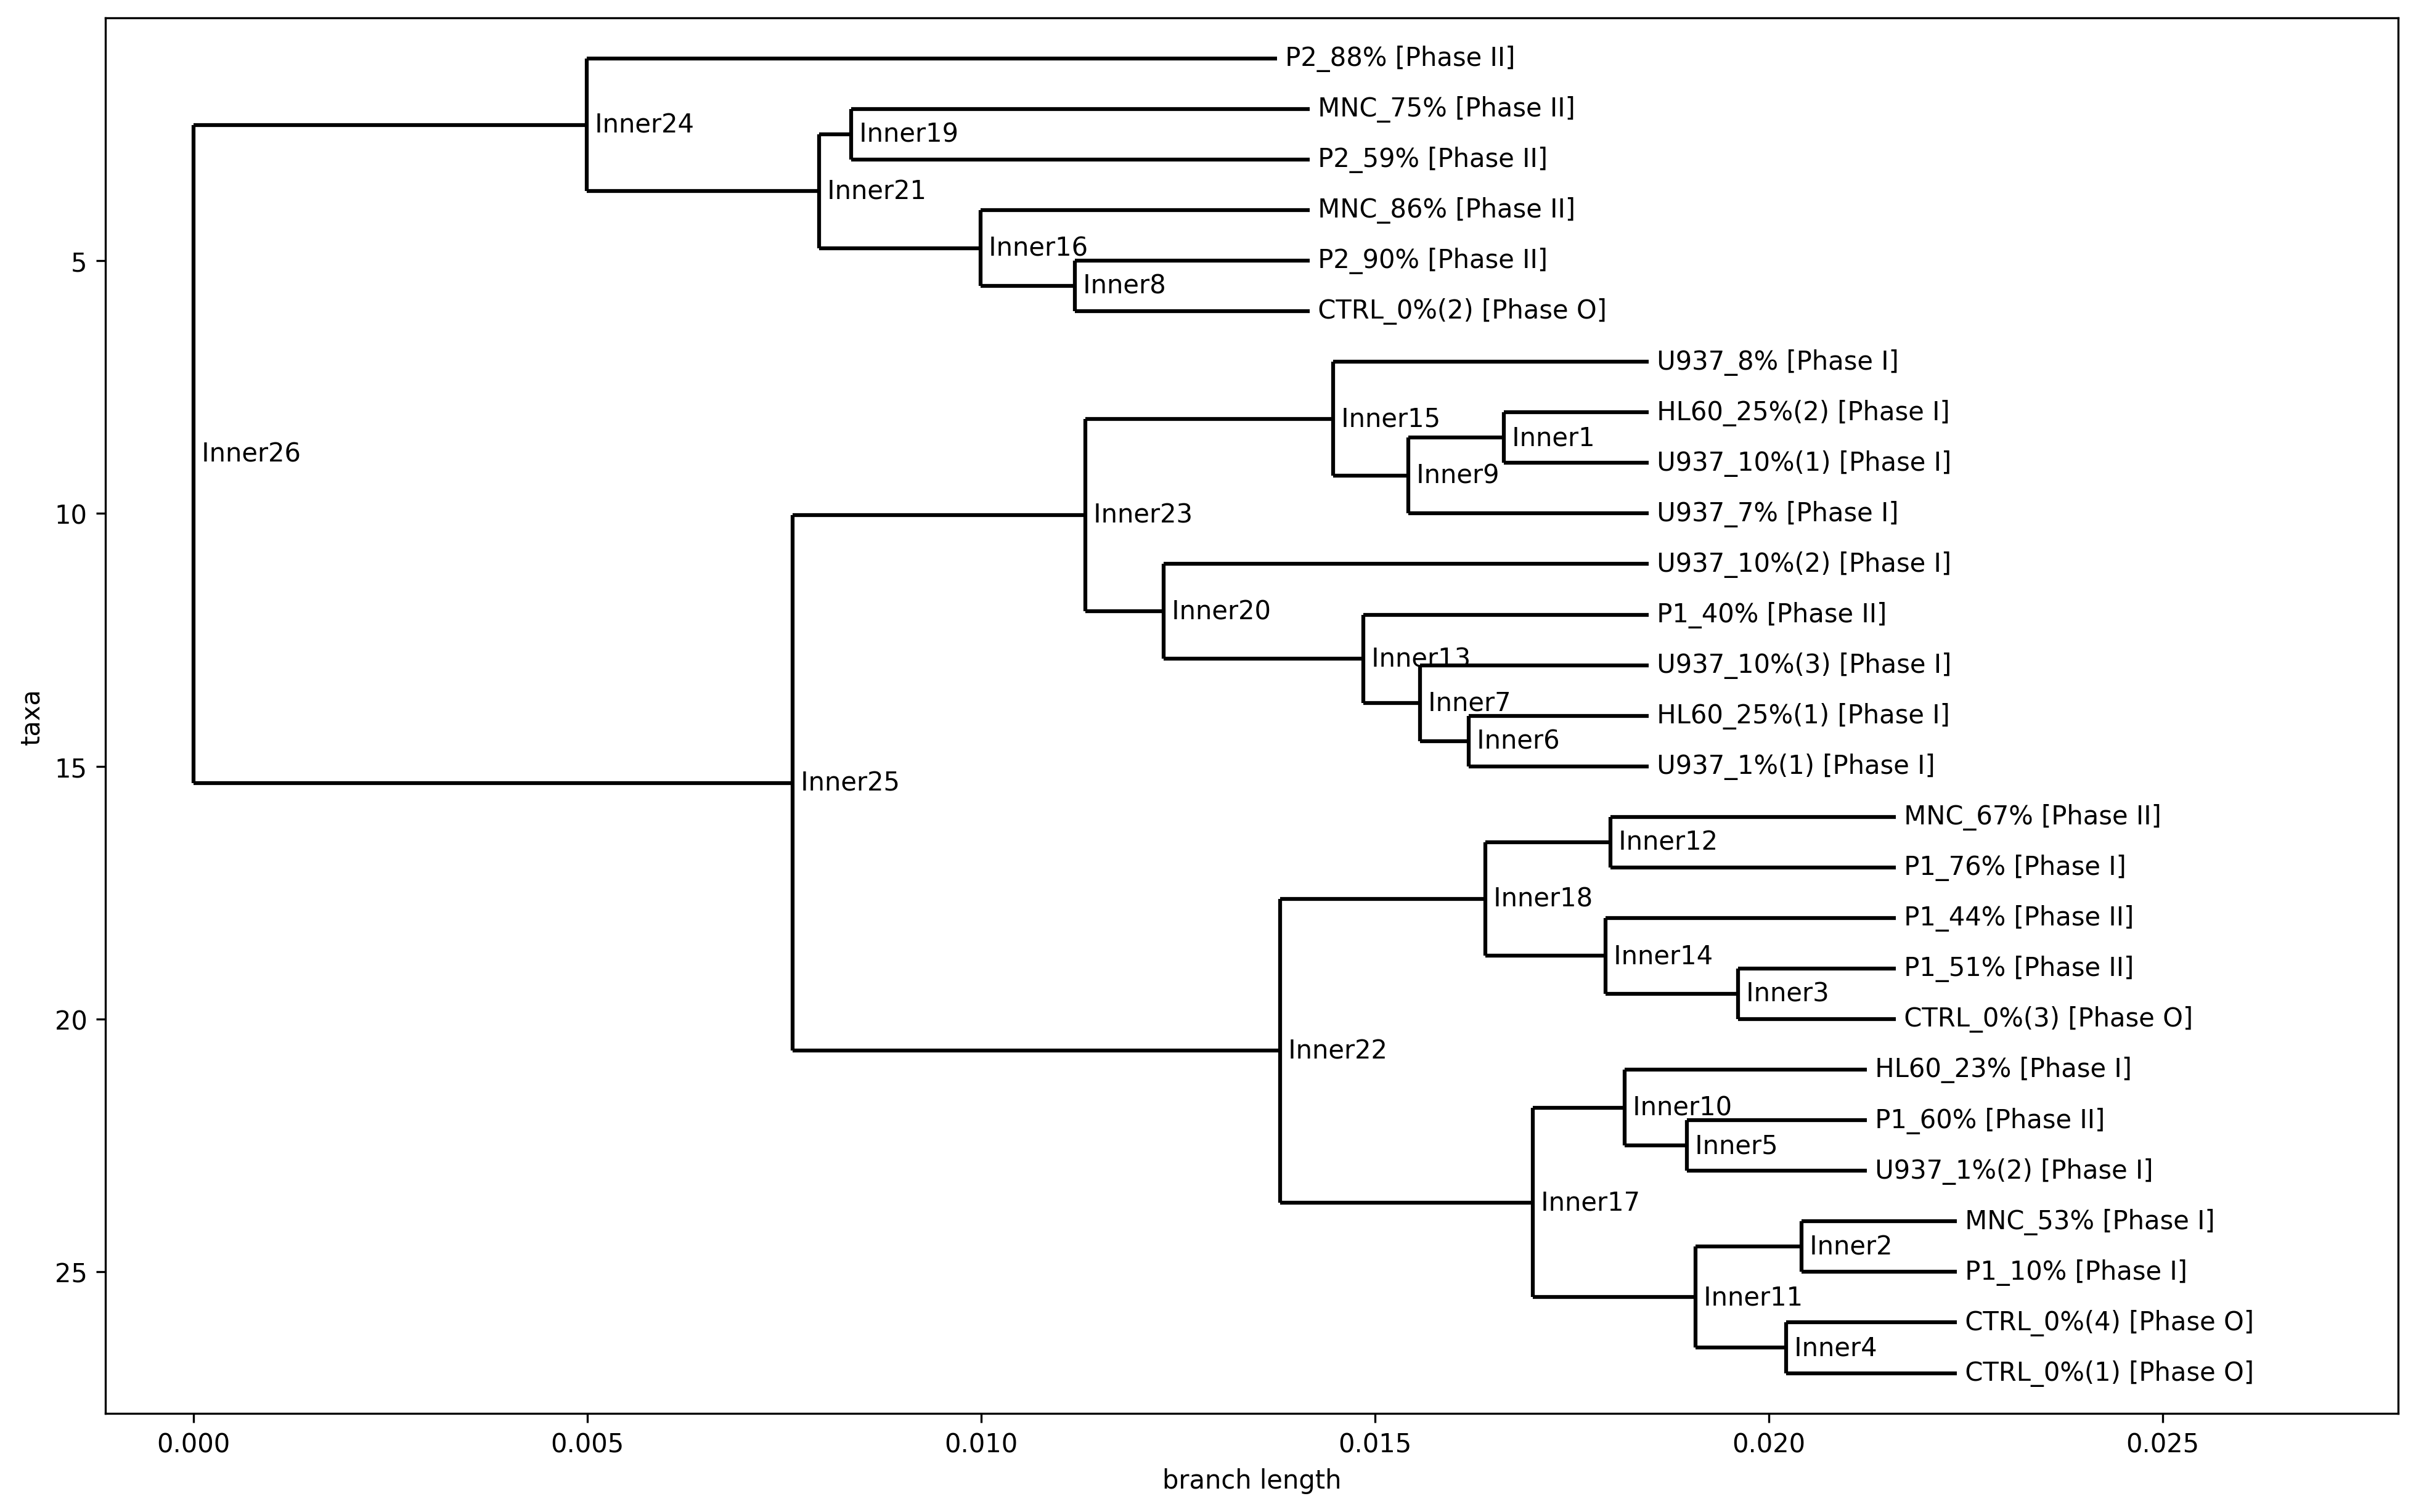

In [83]:
ph1nw_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(ph1_nw_heatmaps_list[i][1]-ph1_nw_heatmaps_list[j][1]))
    ph1nw_distlist.append(ls)
    

constructor = DistanceTreeConstructor()
ph1nw_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, ph1nw_distlist)
UPGMATree = constructor.upgma(ph1nw_distmat)
fig = plt.figure(figsize=(16,10),dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)